<p align="center">
  <img src="https://github.com/kartikey-vyas-DS/Netflix-data-analysis/raw/main/Netflix-Projects.gif" alt="Netflix Projects">
</p>



### <span style="color: red;">Problem Statement </span>
- The primary objective of this project is to extract valuable insights from the available Netflix dataset. These insights should aid Netflix in making informed decisions regarding the types of movies and TV shows to produce and strategize business growth in different countries.

#### Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 

#### Reading Data from CSV file

In [3]:
df = pd.read_csv("C:/Users/kvsvy/Downloads/netflix.csv")   # This csv file is saved in DF dataframe variable.
df.head()   # head() shows us the first 5 rows of Data to take a first look at it!

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### <span style="color: navy;">Pre-Processing of data </span>

#### <span style="color: red;">1. In order to understand the data better, let me introduce some basic Metrics of this Dataset.</span>`


In [4]:
print(f'Number of rows initially in the raw dataset is:- {df.shape[0]} \nNumber of columns initially in the raw dataseet is:- {df.shape[1]}')

Number of rows initially in the raw dataset is:- 8807 
Number of columns initially in the raw dataseet is:- 12


In [5]:
df.duplicated().sum()   # this ensures that the dataset consist of unique movies without repetition.

0

- it is intersting to note that there are as many as 1793 Tv shows that has only 1 season
- the frequency in rating suggests that TV-MA is the most rated type , it basically means Mature Audience Only
- No. of movies produced in United states (2845) are higher than other countries 
- threre seems to be a lot of Missing Director names here, the reason can be that a lot of Tv shows has different directors directig perticular episode and naming all wouldnt be possible here!(for example a Tv show called 'tales of the city' has 10 episodes and 6 directors to direct them!)
- Rajiv Chilaka is most likely a director thas has most movies/Tv shows directed in the dataset but we will confirm that in our further analysis 
- 2018 seems to be the year when most of movies/tv shows were, released, we will precisely check this in our futher analysis 
- 1st Jan 2020 seems to be the date when highet number of movies/tv shows were added, we will verify this as well in our analysis further 
- Dramas, International Movies are the most opted genere, we will narrow down further to find the top number.
- further diving into data it is found that there are movies with dubbed language as well here, for example Bhoomika , it is available in 4 different languages and there are total of 27 movies/tv shows like that and total number including all languages are 59.
- There are Two ```type``` of Entertainment options as ```Movie``` and ```TV Show```


In [6]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [7]:
grouped = df.groupby('description').filter(lambda x: len(x) > 1)
print(f'Number of movies/Tv shows repeated as presented in another language are:-  {grouped['description'].value_counts().count()} \nNumber of total movies/Tv shows including all languages would be :- {grouped.shape[0]}')

Number of movies/Tv shows repeated as presented in another language are:-  27 
Number of total movies/Tv shows including all languages would be :- 59


#### <span style="color: red;">2. Data Types of Columns.</span>
- as we can observe from the output below, only 1 out of 12 columns are numerical and the rest are object / Non numerical Data 

- Now as we saw earlier that ```date_added``` column is not formatted as datetime data-type, the next steps will convert the column to datetime and two new columns will be populated namely ```month_added``` and ```year_added```

- column ```duration``` for movies has values like 90 min and Tv shows has values like 1 season / 2 seasons, we will remove the strings such as min and season/seasons to optimize the usage of 'duration' column 


In [8]:
df['release_year'] = df['release_year'].astype(int)   # sometimes pandas changes integer columns to object we can change the data type back to integer
print('     12 columns and their data types \n')
df.info()

     12 columns and their data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int32 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int32(1), object(11)
memory usage: 791.4+ KB


In [9]:
df['date_added'].value_counts()

date_added
January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
December 4, 2016       1
November 21, 2016      1
November 19, 2016      1
November 17, 2016      1
January 11, 2020       1
Name: count, Length: 1767, dtype: int64

In [10]:
df['date_added'].unique()

array(['September 25, 2021', 'September 24, 2021', 'September 23, 2021',
       ..., 'December 6, 2018', 'March 9, 2016', 'January 11, 2020'],
      dtype=object)

In [11]:
print('there are 88 rows in the `date_added`  column that has leading spaces and can create problem while changing to datetime format')
df['date_added'].apply(lambda x: isinstance(x, str) and x.startswith(' ')).value_counts() # this is to check for leading spaces in the column values 


there are 88 rows in the `date_added`  column that has leading spaces and can create problem while changing to datetime format


date_added
False    8719
True       88
Name: count, dtype: int64

In [12]:
df['date_added'] = df['date_added'].str.strip()   # this will remove the leading spaces present in 88 rows detected earlier
df['date_added'] = pd.to_datetime(df['date_added'])

In [13]:
df['date_added'].value_counts()   

date_added
2020-01-01    110
2019-11-01     91
2018-03-01     75
2019-12-31     74
2018-10-01     71
             ... 
2017-02-21      1
2017-02-07      1
2017-01-29      1
2017-01-25      1
2020-01-11      1
Name: count, Length: 1714, dtype: int64

In [14]:
print(f'first & latest movie/tvshow added on netflix \n First:- {df['date_added'].min().strftime('%B %Y')} \n Latest:- {df['date_added'].max().strftime('%B %Y')}')

first & latest movie/tvshow added on netflix 
 First:- January 2008 
 Latest:- September 2021


In [15]:
# Verifying and quantifying the 'type' column in the dataset
print(f'column `type` in this dataset has two values Movies and TV Show, below mentioned is their distribution; \nMovie counts:- {df['type'].value_counts().iloc[0]} \nTv Show counts:- {df['type'].value_counts().iloc[1]}')

column `type` in this dataset has two values Movies and TV Show, below mentioned is their distribution; 
Movie counts:- 6131 
Tv Show counts:- 2676


In [16]:
df.loc[df['type'] == 'Movie', 'duration'] = df.loc[df['type'] == 'Movie', 'duration'].str.replace(' min', '').astype(float)
# This removes the `min` from duration column with Movies 

In [17]:
df.loc[df['type'] == 'TV Show', 'duration'] = df.loc[df['type'] == 'TV Show', 'duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(float)
# This removes the `season/seasons` from duration column with TV Shows  


In [18]:
df.loc[df['type'] == 'TV Show', 'duration'].value_counts()

duration
1.0     1793
2.0      425
3.0      199
4.0       95
5.0       65
6.0       33
7.0       23
8.0       17
9.0        9
10.0       7
13.0       3
15.0       2
12.0       2
11.0       2
17.0       1
Name: count, dtype: int64

In [19]:
df.loc[df['type'] == 'Movie', 'duration'].value_counts()

duration
90.0     152
94.0     146
93.0     146
97.0     146
91.0     144
        ... 
212.0      1
8.0        1
186.0      1
193.0      1
191.0      1
Name: count, Length: 205, dtype: int64

In [20]:
df['duration'] = df['duration'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int32         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   float64       
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(9)
memory usage: 791.4+ KB


- as we can observe from the output above, changing of ```date_added``` column to datetime, populating ```month_added``` and ```year_added``` column along with removing strings from ```duration```column is dealt with;

 #### <span style="color: red;">3. Unnesting of columns containing more than one value.</span>
- Now it is very crucial to check whether the unique values contain one element or two, for example if a column 'director' has two names in the same datapoint, it is understood that the movie was directed by two individuals, and hence they both need to be seperated into a new row, the next steps are intented to check for such columns 

In [21]:
df['director'].value_counts()

director
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: count, Length: 4528, dtype: int64

In [22]:
df['country'].value_counts()

country
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

##### in the output shown above 
- 'director' column has certain rows where names of two or more director names are present, which clearly indicates that the perticular movie was directed by two or more directors, hence the next steps are defined to expand the dataset in a ```copy``` such that each row consist of only one director, this will enable us to identify the number of movies contributed by each unique director.
- 'country' column has certain rows where names of two or more countries are present, which clealy indicates that the perticular movie was produced in multiple countries, hence the next steps are defined to expand the dataset in a ```copy``` such that each row consist of only one country, this will enable us to identify the number of movies produced by each unique country.
- 'cast' column has certain rows where names of two or more Actor names are present, which clealy indicates that the perticular movie had two or more number of actors, hence the next steps are defined to expand the dataset in a ```copy``` such that each row consist of only one Actor, this will enable us to identify the number of movies each actors worked on.
- 'listed_in' column has certain rows where names of two or more genre are present, which clealy indicates that the perticular movie covers multiple genre, hence the next steps are defined to expand the dataset in a ```copy``` such that each row consist of only one genre, this will enable us to identify the number of movies covered under each genre.
- we could have done all 4 unnesting in a single copy, but this would not be efficient if the dataset was larger in number of rows, hence to make the approach more general for larger datasets we kept unnesting in seperate parts 
- once all the unnesting is done we merge the data using a common unique feature which in our case can be 'show_id' or 'title'

In [23]:
df1= df.copy()
df1['director'] = df['director'].str.split(', ')
df1['cast'] = df1['cast'].str.split(', ')
df1['country'] = df['country'].str.split(', ')
df1['listed_in'] = df['listed_in'].str.split(', ')

df_director = df1[['title', 'director']].explode('director')
df_cast = df1[['title', 'cast']].explode('cast')
df_country = df1[['title', 'country']].explode('country')
df_listed_in = df1[['title', 'listed_in']].explode('listed_in')

In [24]:
merged_df = df_director.merge(df_cast, on=['title'], how='inner')\
                       .merge(df_country, on=['title'], how='inner')\
                       .merge(df_listed_in, on=['title'], how='inner')

In [25]:
fdf= merged_df.merge(df[['show_id', 'type', 'title', 'date_added',
       'release_year', 'rating', 'duration']],on=['title'],how= 'inner')

In [26]:
fdf.shape

(201991, 11)

In [27]:
fdf.head()

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,Documentaries,s1,Movie,2021-09-25,2020,PG-13,90.0
1,Blood & Water,NaN,Ama Qamata,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2.0
2,Blood & Water,NaN,Ama Qamata,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021,TV-MA,2.0
3,Blood & Water,NaN,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,2021-09-24,2021,TV-MA,2.0
4,Blood & Water,NaN,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2.0


In [28]:
fdf.isnull().sum()

title               0
director        50643
cast             2146
country         11897
listed_in           0
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            3
dtype: int64

 #### <span style="color: red;">4. Null Values Identification and relevent actions.</span>


In [29]:
print('Total Percentage of null values for each column :-')
(fdf.isnull().sum()/fdf.shape[0])*100

Total Percentage of null values for each column :-


title            0.000000
director        25.071909
cast             1.062424
country          5.889866
listed_in        0.000000
show_id          0.000000
type             0.000000
date_added       0.078221
release_year     0.000000
rating           0.033170
duration         0.001485
dtype: float64

- as we can see from the results that out of 11 columns, **6 columns** (>50% of columns) contains null values, out of those 6 columns. 
    - 3 columns are **Director, Cast, rating** [ we will have to fill these with "Unknown" tag as both columns are catagorical and % of nulls is also relatively high]
    - for **'date_added'** column we will impute the values by mode of date_added to the corresponding release_year, for example if we have a null value in date_added column where release year is 2015, we will look for the mode of date_added column when the release year is 2015 and we will fill that value in date_added missing value.
    - **'duration'** ~ for this columns we will take a look at null location to see if there's any simple entry mistakes that can be corrected.
    - **'country'** ~ we will fill these nulls with modes of director and cast country in other titles and the rest of null values will be filled as 'unknown'

In [30]:
fdf['director']= fdf['director'].fillna('Unknown Director')
fdf['cast']= fdf['cast'].fillna('Unknown Actor')

In [31]:
fdf.loc[fdf[fdf['rating'].isna()].index]     # Checking the nulls of 'rating' column

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration
135125,13TH: A Conversation with Oprah Winfrey & Ava ...,Unknown Director,Oprah Winfrey,NaN,Movies,s5990,Movie,2017-01-26,2017,NaN,37.0
135126,13TH: A Conversation with Oprah Winfrey & Ava ...,Unknown Director,Ava DuVernay,NaN,Movies,s5990,Movie,2017-01-26,2017,NaN,37.0
154377,Gargantia on the Verdurous Planet,Unknown Director,Kaito Ishikawa,Japan,Anime Series,s6828,TV Show,2016-12-01,2013,NaN,1.0
154378,Gargantia on the Verdurous Planet,Unknown Director,Kaito Ishikawa,Japan,International TV Shows,s6828,TV Show,2016-12-01,2013,NaN,1.0
154379,Gargantia on the Verdurous Planet,Unknown Director,Hisako Kanemoto,Japan,Anime Series,s6828,TV Show,2016-12-01,2013,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...
171942,My Honor Was Loyalty,Alessandro Pepe,Francesco Migliore,Italy,Dramas,s7538,Movie,2017-03-01,2015,NaN,115.0
171943,My Honor Was Loyalty,Alessandro Pepe,Albrecht Weimer,Italy,Dramas,s7538,Movie,2017-03-01,2015,NaN,115.0
171944,My Honor Was Loyalty,Alessandro Pepe,Giulia Dichiaro,Italy,Dramas,s7538,Movie,2017-03-01,2015,NaN,115.0
171945,My Honor Was Loyalty,Alessandro Pepe,Alessandra Oriti Niosi,Italy,Dramas,s7538,Movie,2017-03-01,2015,NaN,115.0


In [32]:
# changing the null values of rating column to 'unknown'
fdf['rating'] = fdf['rating'].fillna('Unknown rating')

In [33]:
fdf.loc[fdf[fdf['date_added'].isna()].index]    # Checking the nulls of 'date_added' column

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration
136893,A Young Doctor's Notebook and Other Stories,Unknown Director,Daniel Radcliffe,United Kingdom,British TV Shows,s6067,TV Show,NaT,2013,TV-MA,2.0
136894,A Young Doctor's Notebook and Other Stories,Unknown Director,Daniel Radcliffe,United Kingdom,TV Comedies,s6067,TV Show,NaT,2013,TV-MA,2.0
136895,A Young Doctor's Notebook and Other Stories,Unknown Director,Daniel Radcliffe,United Kingdom,TV Dramas,s6067,TV Show,NaT,2013,TV-MA,2.0
136896,A Young Doctor's Notebook and Other Stories,Unknown Director,Jon Hamm,United Kingdom,British TV Shows,s6067,TV Show,NaT,2013,TV-MA,2.0
136897,A Young Doctor's Notebook and Other Stories,Unknown Director,Jon Hamm,United Kingdom,TV Comedies,s6067,TV Show,NaT,2013,TV-MA,2.0
...,...,...,...,...,...,...,...,...,...,...,...
186891,The Adventures of Figaro Pho,Unknown Director,Charlotte Hamlyn,Australia,TV Comedies,s8183,TV Show,NaT,2015,TV-Y7,2.0
186892,The Adventures of Figaro Pho,Unknown Director,Stavroula Mountzouris,Australia,Kids' TV,s8183,TV Show,NaT,2015,TV-Y7,2.0
186893,The Adventures of Figaro Pho,Unknown Director,Stavroula Mountzouris,Australia,TV Comedies,s8183,TV Show,NaT,2015,TV-Y7,2.0
186894,The Adventures of Figaro Pho,Unknown Director,Aletheia Burney,Australia,Kids' TV,s8183,TV Show,NaT,2015,TV-Y7,2.0


In [34]:
# here we are adding the mode of date added corresponding to the year it was released at.
for year in fdf[fdf['date_added'].isnull()]['release_year'].unique():
    val=fdf[fdf['release_year']==year]['date_added'].mode().values[0]
    fdf.loc[fdf['release_year']==year,'date_added']=fdf.loc[fdf['release_year']==year,'date_added'].fillna(val)


In [35]:
fdf.loc[fdf[fdf['duration'].isna()].index]    # Checking the nulls of 'duration' column

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration
126537,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,Movies,s5542,Movie,2017-04-04,2017,74 min,NaN
131603,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,Movies,s5795,Movie,2016-09-16,2010,84 min,NaN
131737,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,Movies,s5814,Movie,2016-08-15,2015,66 min,NaN


- as we can observe from the above three outputs, 'duration' column can be filled as it was mistakenly filled under the column 'rating', simultaneously we will remove the same from rating as it's irrelevant for the 'rating' column 
    - Column 'duration' is filled with relevant info and column 'rating' and 'date_added' is filled with "Unknown" in the output below 

In [36]:
duration_null_index= fdf.index[fdf['duration'].isna()]   # Checking the nulls of 'duration' column
duration_null_index

Index([126537, 131603, 131737], dtype='int64')

In [37]:
fdf[fdf['duration'].isnull()]

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration
126537,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,Movies,s5542,Movie,2017-04-04,2017,74 min,NaN
131603,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,Movies,s5795,Movie,2016-09-16,2010,84 min,NaN
131737,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,Movies,s5814,Movie,2016-08-15,2015,66 min,NaN


In [38]:
fdf['rating_numeric'] = fdf['rating'].str.extract(r'(\d+)').astype(float)  # since we have already processed the duration column we will extract number via re.
fdf['duration'] = fdf['duration'].fillna(fdf['rating_numeric'])   # filling values from rating_numeric column 
fdf.drop(columns=['rating_numeric'], inplace=True) # dropping the unnecessary column 
fdf.loc[duration_null_index,'rating'] = 'Unknown rating'
fdf.loc[duration_null_index]

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration
126537,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,Movies,s5542,Movie,2017-04-04,2017,Unknown rating,74.0
131603,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,Movies,s5795,Movie,2016-09-16,2010,Unknown rating,84.0
131737,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,Movies,s5814,Movie,2016-08-15,2015,Unknown rating,66.0


In [39]:
# A Function to impute Null values using Mode of relative columns
def impute_based_on_mode(df, target_col, group_col):
    for group in df[df[target_col].isnull()][group_col].unique():
        if group in df[~df[target_col].isnull()][group_col].unique():
            mode_value = df[df[group_col] == group][target_col].mode().values[0]
            df.loc[df[group_col] == group, target_col] = df.loc[df[group_col] == group, target_col].fillna(mode_value)
    return df

fdf= impute_based_on_mode(fdf, 'country', 'director')
fdf= impute_based_on_mode(fdf, 'country', 'cast')

In [40]:
fdf['country']= fdf['country'].fillna('Unknown Country')

In [41]:
fdf.isnull().sum()

title           0
director        0
cast            0
country         0
listed_in       0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        0
dtype: int64

In [42]:
fdf.duplicated().sum()  # exploding rows can create duplicates due to having the same names twice in the same row of either direct or cast or genre etc


55

In [43]:
fdf.drop_duplicates(inplace=True)

In [44]:
fdf.duplicated().sum()  # All duplicates are cleared and the dataset is clean!

0

- as shown in the output above, all the null values are dealt with;

- #### Unique Values

In [45]:
# Title & Show id did not have any duplicates
print(f'Unique values of Director:- {fdf['director'].unique()} \nUnique values of Cast:- {fdf['cast'].unique()} \nUnique values of Country:- {fdf['country'].unique()}')

Unique values of Director:- ['Kirsten Johnson' 'Unknown Director' 'Julien Leclercq' ...
 'Majid Al Ansari' 'Peter Hewitt' 'Mozez Singh'] 
Unique values of Cast:- ['Unknown Actor' 'Ama Qamata' 'Khosi Ngema' ... 'Malkeet Rauni'
 'Anita Shabdish' 'Chittaranjan Tripathy'] 
Unique values of Country:- ['United States' 'South Africa' 'France' 'India' 'Ghana' 'Burkina Faso'
 'United Kingdom' 'Germany' 'Ethiopia' 'Unknown Country' 'Thailand'
 'Czech Republic' 'Brazil' 'Mexico' 'Turkey' 'Australia' 'Belgium'
 'Finland' 'China' 'Canada' 'Japan' 'Nigeria' 'Spain' 'Sweden'
 'South Korea' 'Singapore' 'Philippines' 'Italy' 'Romania' 'Argentina'
 'Venezuela' 'Angola' 'Mauritius' 'Hong Kong' 'Russia' '' 'Ireland'
 'Egypt' 'Taiwan' 'Nepal' 'New Zealand' 'Greece' 'Jordan' 'Colombia'
 'Switzerland' 'Israel' 'Bulgaria' 'Algeria' 'Poland' 'Denmark'
 'Saudi Arabia' 'Indonesia' 'Kuwait' 'Cameroon' 'Netherlands' 'Malaysia'
 'Vietnam' 'Hungary' 'Lebanon' 'Syria' 'Iceland' 'United Arab Emirates'
 'Norway' 'Qatar

In [46]:
print(f'Unique values of Genre:- {fdf['listed_in'].unique()} \nUnique values of date_added:- {fdf['date_added'].unique()} \nUnique values of release_year:- {fdf['release_year'].unique()}')

Unique values of Genre:- ['Documentaries' 'International TV Shows' 'TV Dramas' 'TV Mysteries'
 'Crime TV Shows' 'TV Action & Adventure' 'Docuseries' 'Reality TV'
 'Romantic TV Shows' 'TV Comedies' 'TV Horror' 'Children & Family Movies'
 'Dramas' 'Independent Movies' 'International Movies' 'British TV Shows'
 'Comedies' 'Spanish-Language TV Shows' 'Thrillers' 'Romantic Movies'
 'Music & Musicals' 'Horror Movies' 'Sci-Fi & Fantasy' 'TV Thrillers'
 "Kids' TV" 'Action & Adventure' 'TV Sci-Fi & Fantasy' 'Classic Movies'
 'Anime Features' 'Sports Movies' 'Anime Series' 'Korean TV Shows'
 'Science & Nature TV' 'Teen TV Shows' 'Cult Movies' 'TV Shows'
 'Faith & Spirituality' 'LGBTQ Movies' 'Stand-Up Comedy' 'Movies'
 'Stand-Up Comedy & Talk Shows' 'Classic & Cult TV'] 
Unique values of date_added:- <DatetimeArray>
['2021-09-25 00:00:00', '2021-09-24 00:00:00', '2021-09-23 00:00:00',
 '2021-09-22 00:00:00', '2021-09-21 00:00:00', '2021-09-20 00:00:00',
 '2021-09-19 00:00:00', '2021-09-17 00:00:

In [47]:
print(f'Unique values of rating:- {fdf['rating'].unique()} \nUnique values of duration:- {fdf['duration'].unique()}')

Unique values of rating:- ['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' 'Unknown rating' 'NR' 'TV-Y7-FV' 'UR'] 
Unique values of duration:- [ 90.   2.   1.  91. 125.   9. 104. 127.   4.  67.  94.   5. 161.  61.
 166. 147. 103.  97. 106. 111.   3. 110. 105.  96. 124. 116.  98.  23.
 115. 122.  99.  88. 100.   6. 102.  93.  95.  85.  83. 113.  13. 182.
  48. 145.  87.  92.  80. 117. 128. 119. 143. 114. 118. 108.  63. 121.
 142. 154. 120.  82. 109. 101.  86. 229.  76.  89. 156. 112. 107. 129.
 135. 136. 165. 150. 133.  70.  84. 140.  78.   7.  64.  59. 139.  69.
 148. 189. 141. 130. 138.  81. 132.  10. 123.  65.  68.  66.  62.  74.
 131.  39.  46.  38.   8.  17. 126. 155. 159. 137.  12. 273.  36.  34.
  77.  60.  49.  58.  72. 204. 212.  25.  73.  29.  47.  32.  35.  71.
 149.  33.  15.  54. 224. 162.  37.  75.  79.  55. 158. 164. 173. 181.
 185.  21.  24.  51. 151.  42.  22. 134. 177.  52.  14.  53.  57.  28.
  50.  26.  45. 171.  27.  44. 146.  20. 157. 20

#### <span style="color: red;">Outliers Detection and relevant actions.</span>

- out of all columns here only duration column make sense to check for any outliers 
-  we will check outliers for Movies and TV/Shows seperately


In [48]:
fdf[fdf['type']=='Movie'].describe().iloc[:,2]

count    145788.000000
mean        106.854330
min           3.000000
25%          93.000000
50%         104.000000
75%         119.000000
max         312.000000
std          24.700966
Name: duration, dtype: float64

In [49]:
fdf[fdf['type']=='TV Show'].describe().iloc[:,2]

count    56148.000000
mean         1.928101
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         17.000000
std          1.811729
Name: duration, dtype: float64

In [50]:
def find_outliers(df, column_name):
    #Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    # lower and upper bound for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    return outliers

In [51]:
find_outliers((fdf[fdf['type']=='Movie']),'duration')

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration
621,Avvai Shanmughi,K.S. Ravikumar,Kamal Hassan,India,Comedies,s23,Movie,2021-09-21,1996,TV-PG,161.0
622,Avvai Shanmughi,K.S. Ravikumar,Kamal Hassan,India,International Movies,s23,Movie,2021-09-21,1996,TV-PG,161.0
623,Avvai Shanmughi,K.S. Ravikumar,Meena,Unknown Country,Comedies,s23,Movie,2021-09-21,1996,TV-PG,161.0
624,Avvai Shanmughi,K.S. Ravikumar,Meena,Unknown Country,International Movies,s23,Movie,2021-09-21,1996,TV-PG,161.0
625,Avvai Shanmughi,K.S. Ravikumar,Gemini Ganesan,Unknown Country,Comedies,s23,Movie,2021-09-21,1996,TV-PG,161.0
...,...,...,...,...,...,...,...,...,...,...,...
201073,Yaadein,Subhash Ghai,Supriya Karnik,India,International Movies,s8771,Movie,2018-03-01,2001,TV-14,171.0
201074,Yaadein,Subhash Ghai,Supriya Karnik,India,Romantic Movies,s8771,Movie,2018-03-01,2001,TV-14,171.0
201075,Yaadein,Subhash Ghai,Anang Desai,India,Dramas,s8771,Movie,2018-03-01,2001,TV-14,171.0
201076,Yaadein,Subhash Ghai,Anang Desai,India,International Movies,s8771,Movie,2018-03-01,2001,TV-14,171.0


In [52]:
find_outliers((fdf[fdf['type']=='TV Show']),'duration')

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration
323,The Great British Baking Show,Andy Devonshire,Mel Giedroyc,United Kingdom,British TV Shows,s9,TV Show,2021-09-24,2021,TV-14,9.0
324,The Great British Baking Show,Andy Devonshire,Mel Giedroyc,United Kingdom,Reality TV,s9,TV Show,2021-09-24,2021,TV-14,9.0
325,The Great British Baking Show,Andy Devonshire,Sue Perkins,United Kingdom,British TV Shows,s9,TV Show,2021-09-24,2021,TV-14,9.0
326,The Great British Baking Show,Andy Devonshire,Sue Perkins,United Kingdom,Reality TV,s9,TV Show,2021-09-24,2021,TV-14,9.0
327,The Great British Baking Show,Andy Devonshire,Mary Berry,United Kingdom,British TV Shows,s9,TV Show,2021-09-24,2021,TV-14,9.0
...,...,...,...,...,...,...,...,...,...,...,...
200089,When Calls the Heart,Unknown Director,Erica Carroll,United States,TV Dramas,s8727,TV Show,2018-12-29,2017,TV-PG,5.0
200090,When Calls the Heart,Unknown Director,Darius Zaviceanu,United States,TV Dramas,s8727,TV Show,2018-12-29,2017,TV-PG,5.0
200091,When Calls the Heart,Unknown Director,Charlotte Hegele,United States,TV Dramas,s8727,TV Show,2018-12-29,2017,TV-PG,5.0
200092,When Calls the Heart,Unknown Director,Steve Bacic,United States,TV Dramas,s8727,TV Show,2018-12-29,2017,TV-PG,5.0


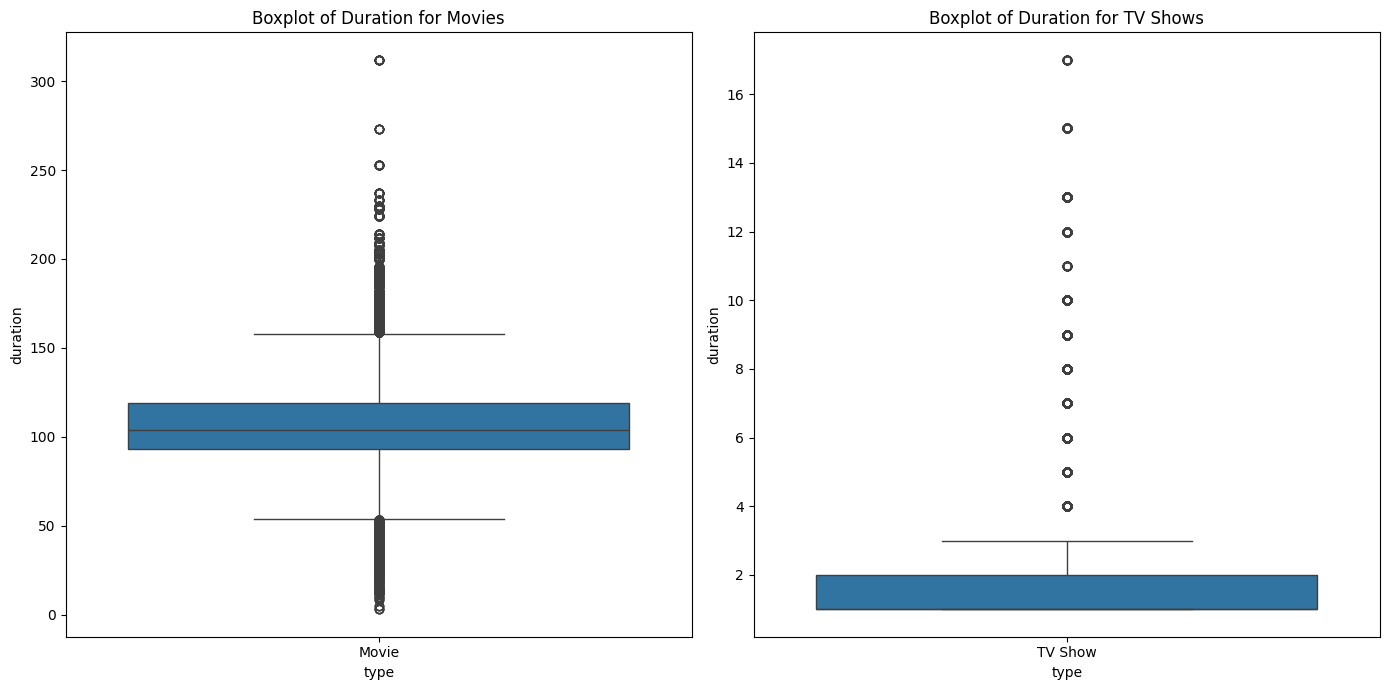

In [53]:
plt.figure(figsize=(14, 7))

# Boxplot for Movies
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.boxplot(x='type', y='duration', data=(fdf[fdf['type']=='Movie']))
plt.title('Boxplot of Duration for Movies')

# Boxplot for TV Shows
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.boxplot(x='type', y='duration', data=(fdf[fdf['type']=='TV Show']))
plt.title('Boxplot of Duration for TV Shows')

plt.tight_layout()
plt.show()

- as we can see from the observed plot and outlier DF's it is understood that it has plenty of outliers, in movies part duration below whiskers(ie. below 50) is for short movies, for example a short movie called 'silent' is only 3 minutes long and a movie called'Black Mirror: Bandersnatch' is 312 minutes long, similarly in TV Shows 'Grey's Anatomy' has the highest number of seasons (i.e 17)

#### <span style="color: navy;">Data Visualization ~ Univariate & Bivariate.</span>

#####   <span style="color: red;">Univariate</span>

In [54]:
fdf.head()

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,Documentaries,s1,Movie,2021-09-25,2020,PG-13,90.0
1,Blood & Water,Unknown Director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2.0
2,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021,TV-MA,2.0
3,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,2021-09-24,2021,TV-MA,2.0
4,Blood & Water,Unknown Director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2.0


##### <span style="color: purple;">Type.</span>
- This data-set has Two types , 1) Movie  and 2) Tv shows 
    - their distribution 
    1. Movies - 69.6%
    2. TV Shows 30.4% 
        - No. of Movies since 1925 outnumbers No. of TV Shows 

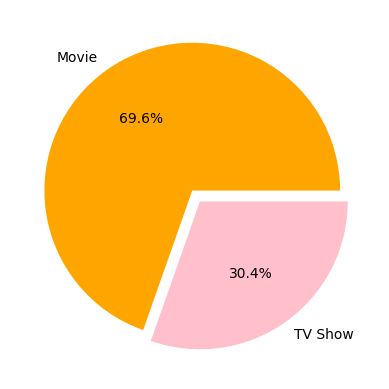

In [55]:
fdf_type= fdf.groupby(['type']).agg({"title":"nunique"}).reset_index()
plt.pie(fdf_type['title'],explode=(0.03,0.06), labels=fdf_type['type'],colors=['orange','pink'],autopct='%.1f%%')
plt.show()

##### <span style="color: purple;">Directors.</span>
- we can clearly see here the director with highest number of movies directed is 'Rajiv Chilaka' an indian Director with indian movies produced in india!

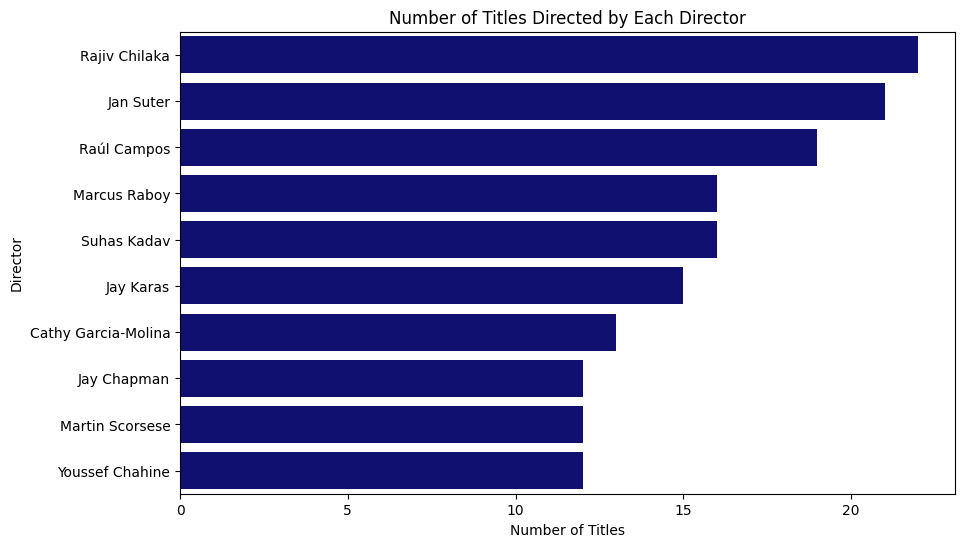

In [56]:
fdf_director= fdf.groupby(['director']).agg({"title":"nunique"}).sort_values(by='title', ascending=False).reset_index().iloc[1:11]
plt.figure(figsize=(10, 6))
sns.barplot(x='title', y='director', data=fdf_director, color='navy')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.title('Number of Titles Directed by Each Director')
plt.show()

In [57]:
fdf[fdf['director']=='Rajiv Chilaka']['title'].unique(),fdf[fdf['director']=='Rajiv Chilaka']['country'].unique()

(array(['Chhota Bheem - Neeli Pahaadi', 'Chhota Bheem & Ganesh',
        'Chhota Bheem & Krishna: Mayanagari',
        'Chhota Bheem & Krishna: Pataliputra- City of the Dead',
        'Chhota Bheem And The Broken Amulet',
        'Chhota Bheem And The Crown of Valhalla',
        'Chhota Bheem and the Incan Adventure',
        'Chhota Bheem and The ShiNobi Secret', 'Chhota Bheem Aur Hanuman',
        'Chhota Bheem aur Krishna', 'Chhota Bheem aur Krishna vs Zimbara',
        'Chhota Bheem: Bheem vs Aliens',
        'Chhota Bheem: Dholakpur to Kathmandu', 'Chhota Bheem: Dus Pe Dus',
        'Chhota Bheem: Journey to Petra',
        'Chhota Bheem: Master of Shaolin',
        'Chhota Bheem: The Rise of Kirmada',
        'Chhota Bheem and the Curse of Damyaan', 'Mighty Raju Rio Calling',
        'Bheemayan', 'Chhota Bheem Kungfu Dhamaka',
        'Dragonkala Ka Rahasya'], dtype=object),
 array(['India'], dtype=object))

##### <span style="color: purple;">Cast.</span>
- we can clearly see here the Actor with highest number of movies Acted in is 'Anupam Kher' 
- interstingly 8 out of top 10 Actors who worked in number of most movies/Tv shows are indians and the rest of two are Japanese

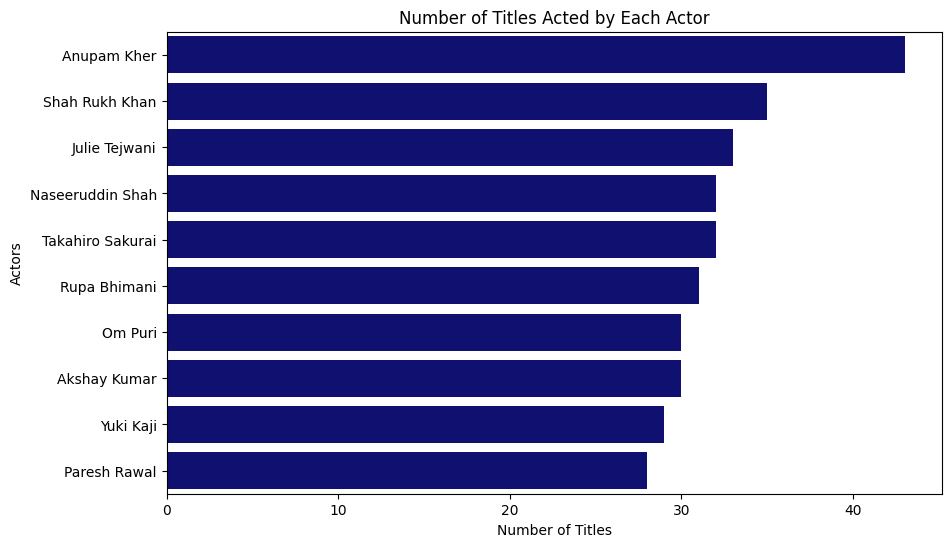

In [58]:
fdf_cast= fdf.groupby(['cast']).agg({"title":"nunique"}).sort_values(by='title', ascending=False).reset_index().iloc[1:11]
plt.figure(figsize=(10, 6))
sns.barplot(x='title', y='cast', data=fdf_cast, color='navy')
plt.xlabel('Number of Titles')
plt.ylabel('Actors')
plt.title('Number of Titles Acted by Each Actor')
plt.show()

In [59]:
fdf[fdf['cast']=='Takahiro Sakurai']['country'].unique(), fdf[fdf['cast']=='Yuki Kaji']['country'].unique()

(array(['United States', 'Japan'], dtype=object),
 array(['Japan', 'United States'], dtype=object))

##### <span style="color: purple;">Country.</span>
- From the plot it is quite clear that United states is by far the most chosen country to produce movies / tv shows

In [60]:
fdf[fdf['country'].str.contains(',')]  # there seems to be trailing comas we need to get rid of.

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration
29234,The Present,Farah Nabulsi,Saleh Bakri,"United Kingdom,",Dramas,s1193,Movie,2021-03-18,2020,TV-MA,24.0
29235,The Present,Farah Nabulsi,Saleh Bakri,"United Kingdom,",International Movies,s1193,Movie,2021-03-18,2020,TV-MA,24.0
29236,The Present,Farah Nabulsi,Maryam Kanj,"United Kingdom,",Dramas,s1193,Movie,2021-03-18,2020,TV-MA,24.0
29237,The Present,Farah Nabulsi,Maryam Kanj,"United Kingdom,",International Movies,s1193,Movie,2021-03-18,2020,TV-MA,24.0
29238,The Present,Farah Nabulsi,Maryam Kamiel Basha,"United Kingdom,",Dramas,s1193,Movie,2021-03-18,2020,TV-MA,24.0
...,...,...,...,...,...,...,...,...,...,...,...
159240,Hotel Pacific,Janusz Majewski,Joanna Kasperska,"Poland,",Dramas,s7008,Movie,2019-10-01,1975,TV-MA,96.0
159241,Hotel Pacific,Janusz Majewski,Joanna Kasperska,"Poland,",International Movies,s7008,Movie,2019-10-01,1975,TV-MA,96.0
159242,Hotel Pacific,Janusz Majewski,Jaroslava Schallerová,"Poland,",Classic Movies,s7008,Movie,2019-10-01,1975,TV-MA,96.0
159243,Hotel Pacific,Janusz Majewski,Jaroslava Schallerová,"Poland,",Dramas,s7008,Movie,2019-10-01,1975,TV-MA,96.0


In [61]:
fdf['country']= fdf['country'].str.rstrip(',')    # this will remove the traling comas 

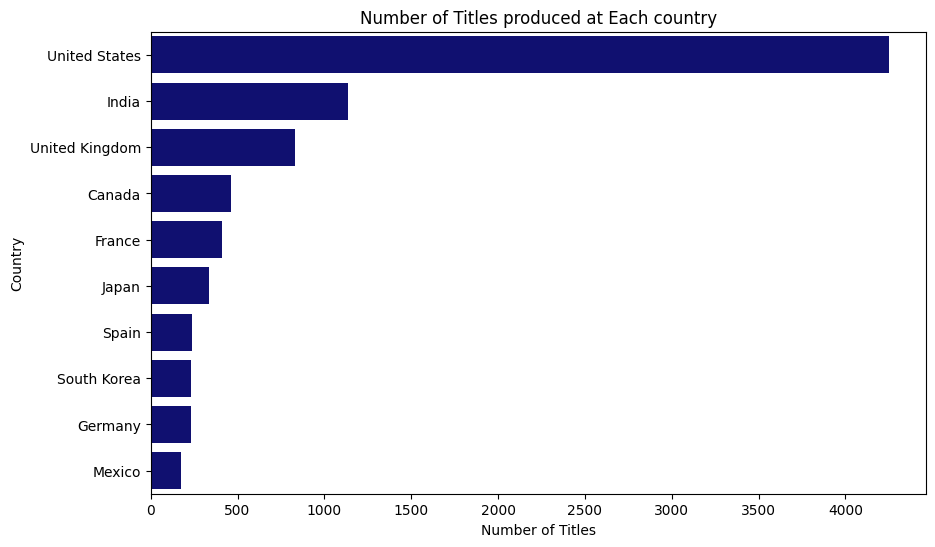

In [62]:
fdf_country= fdf.groupby(['country']).agg({"title":"nunique"}).sort_values(by='title', ascending=False).reset_index().iloc[:11]
fdf_country = fdf_country[fdf_country['country'] != 'Unknown Country']
plt.figure(figsize=(10, 6))
sns.barplot(x='title', y='country', data=fdf_country, color='navy')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.title('Number of Titles produced at Each country')
plt.show()

In [63]:
fdf[fdf['country']=='United States']['cast'].unique()[1:]

array(['Kate Siegel', 'Zach Gilford', 'Hamish Linklater', ...,
       'Kyle Hebert', 'Derek Graf', 'Ryan Newman'], dtype=object)

##### <span style="color: purple;">Genre.</span>
- Majority of the orderly Genre's opted are:
1. International Movies
2. Dramas
3. Comedies
4. International TV Shows

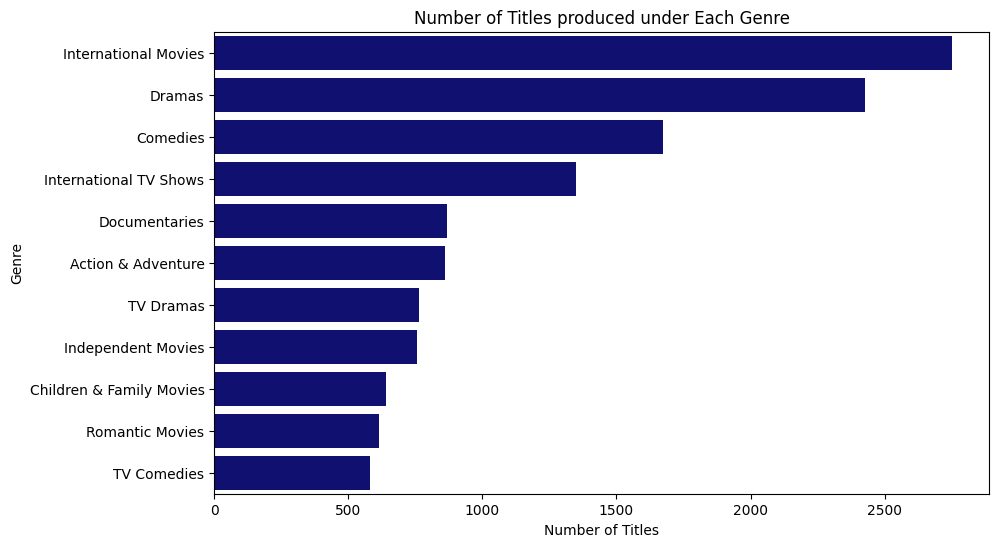

In [64]:
fdf_genre= fdf.groupby(['listed_in']).agg({"title":"nunique"}).sort_values(by='title', ascending=False).reset_index().iloc[:11]
# fdf_genre = fdf_country[fdf_genre['country'] != 'Unknown Country']
plt.figure(figsize=(10, 6))
sns.barplot(x='title', y='listed_in', data=fdf_genre, color='navy')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.title('Number of Titles produced under Each Genre')
plt.show()

##### <span style="color: purple;">Rating.</span>
- Most of the Movies/Tv shows are rated under 'TV-MA'


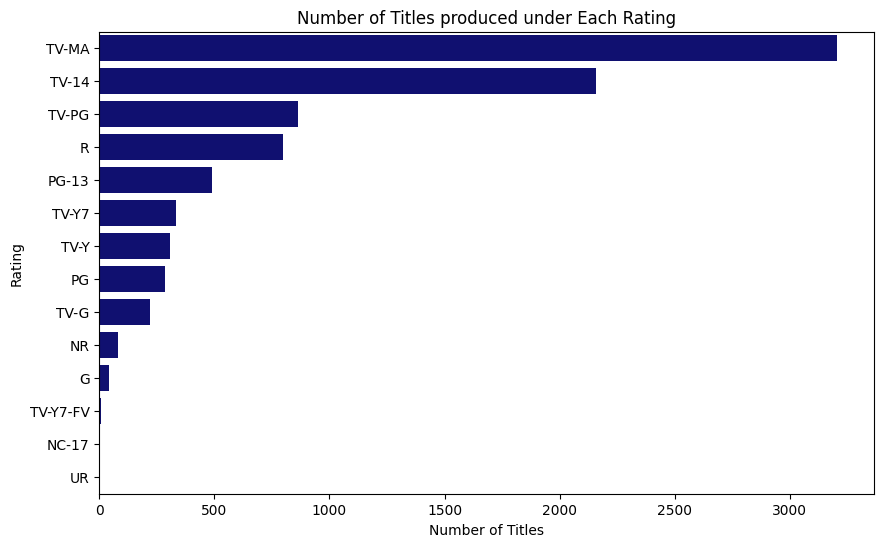

In [65]:
fdf_rating= fdf.groupby(['rating']).agg({"title":"nunique"}).sort_values(by='title', ascending=False).reset_index()
fdf_rating = fdf_rating[fdf_rating['rating'] != 'Unknown rating']
plt.figure(figsize=(10, 6))
sns.barplot(x='title', y='rating', data=fdf_rating, color='navy')
plt.xlabel('Number of Titles')
plt.ylabel('Rating')
plt.title('Number of Titles produced under Each Rating')
plt.show()

In [66]:
fdf[fdf['rating']=='UR']['title'].unique()

array(['Immoral Tales', 'Sex Doll', "You Don't Mess with the Zohan"],
      dtype=object)

##### <span style="color: purple;">Duration.</span>
- we will see this analysis in two parts , 1) Movies , 2) TV Shows
    - as we can infer from the plots, most of the movies lies in the range of 90-100 minutes and most of TV Shows under only 1 Season

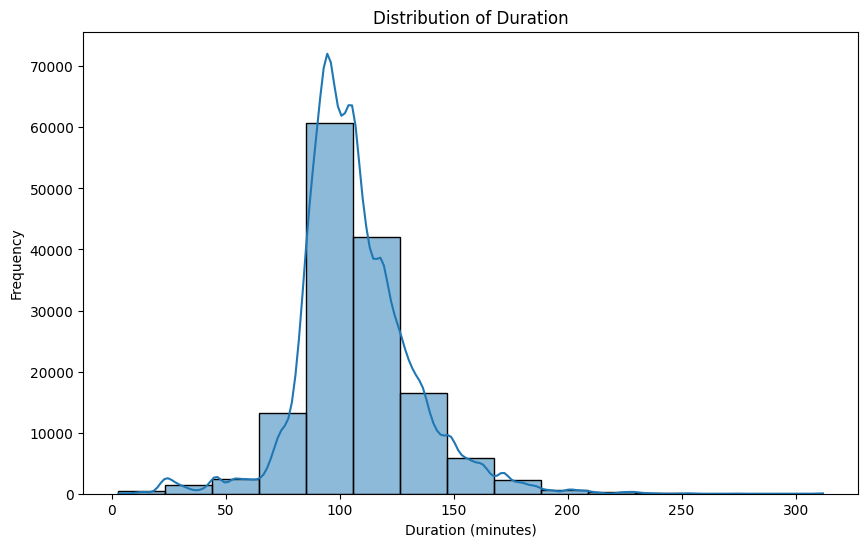

In [67]:
plt.figure(figsize=(10, 6))
sns.histplot((fdf[fdf['type']=='Movie']['duration']), bins=15, kde=True)
plt.title('Distribution of Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

In [68]:
fdf_Movies= fdf[fdf['type']=='Movie'].copy()
fdf_TV_shows= fdf[fdf['type']=='TV Show'].copy()

In [69]:
binsM = [0, 15,30, 50, 60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,315]
labelsM = ['0-15 min', '15-30 min', '30-50 min', '50-60 min', '60-70 min', '70-80 min', '80-90 min', '90-100 min', '100-110 min', '110-120 min', 
          '120-130 min', '130-140 min', '140-150 min', '150-160 min', '160-170 min', '170-180 min', '180-190 min', '190-200 min', '200-210 min', 
          '210-220 min', '220-230 min', '230-240 min', '240-250 min', '250-260 min', '260-270 min', '270-280 min', '280-290 min', '290-300 min', 
          '300-315 min']

# Bin the durations
fdf_Movies['duration_binned'] = pd.cut(fdf_Movies['duration'], bins=binsM, labels=labelsM, right=False)
binsT = [0, 1,5,10,15,20]
labelsT = ['1 season','1-5 seasons','5-10 seasons','10-15 seasons','15-20 seasons']

# Bin the durations
fdf_TV_shows['duration_binned'] = pd.cut(fdf_TV_shows['duration'], bins=binsT, labels=labelsT, right=True)

In [70]:
fdf_duration_M = fdf_Movies.groupby(['duration_binned']).agg({"title":"nunique"}).sort_values(by='title', ascending=False).reset_index().iloc[:10]


C:\Users\kvsvy\AppData\Local\Temp\ipykernel_32892\460704293.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fdf_duration_M = fdf_Movies.groupby(['duration_binned']).agg({"title":"nunique"}).sort_values(by='title', ascending=False).reset_index().iloc[:10]


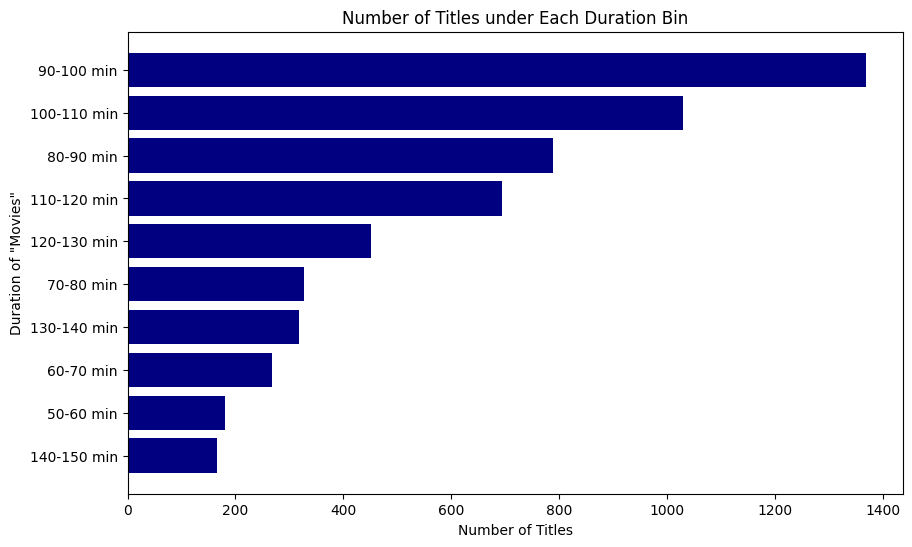

In [71]:
plt.figure(figsize=(10, 6))
plt.barh(fdf_duration_M['duration_binned'], fdf_duration_M['title'], color='navy')
plt.xlabel('Number of Titles')
plt.ylabel('Duration of "Movies"')
plt.title('Number of Titles under Each Duration Bin')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top
plt.show()

In [72]:
fdf_duration_TV = fdf_TV_shows.groupby(['duration_binned']).agg({"title":"nunique"}).sort_values(by='title', ascending=False).reset_index()

C:\Users\kvsvy\AppData\Local\Temp\ipykernel_32892\1585472393.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fdf_duration_TV = fdf_TV_shows.groupby(['duration_binned']).agg({"title":"nunique"}).sort_values(by='title', ascending=False).reset_index()


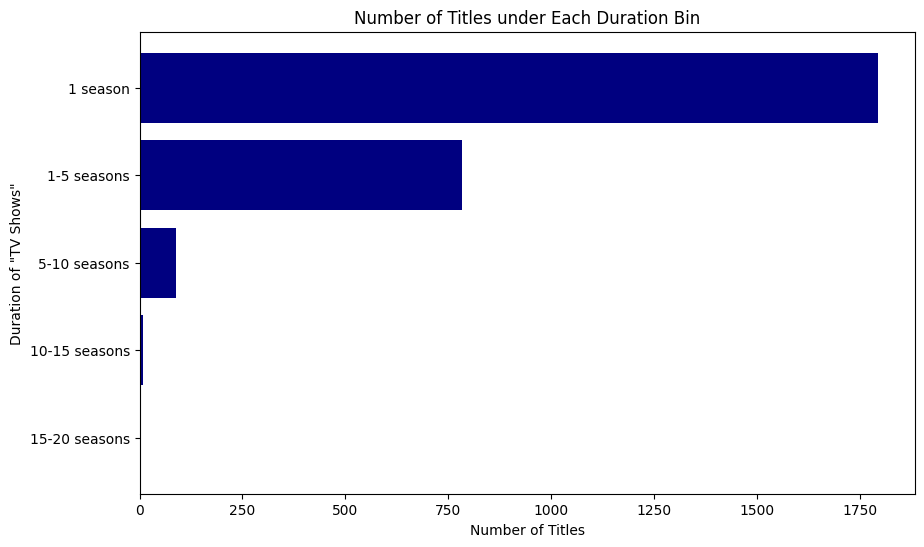

In [73]:
plt.figure(figsize=(10, 6))
bars= plt.barh(fdf_duration_TV['duration_binned'], fdf_duration_TV['title'], color='navy')
plt.xlabel('Number of Titles')
plt.ylabel('Duration of "TV Shows"')
plt.title('Number of Titles under Each Duration Bin')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top
plt.show()

##### <span style="color: purple;">Date added.</span>
- we can see from the hist and bar plot that 2020 and 2019 are th emost active years for adding highest number of movies to the platform, and especially 1-1-2020 is the marks 110 addition in a day., additionally 6-7-2021 is the date when highest number (i.e 31) of TV Shows were added

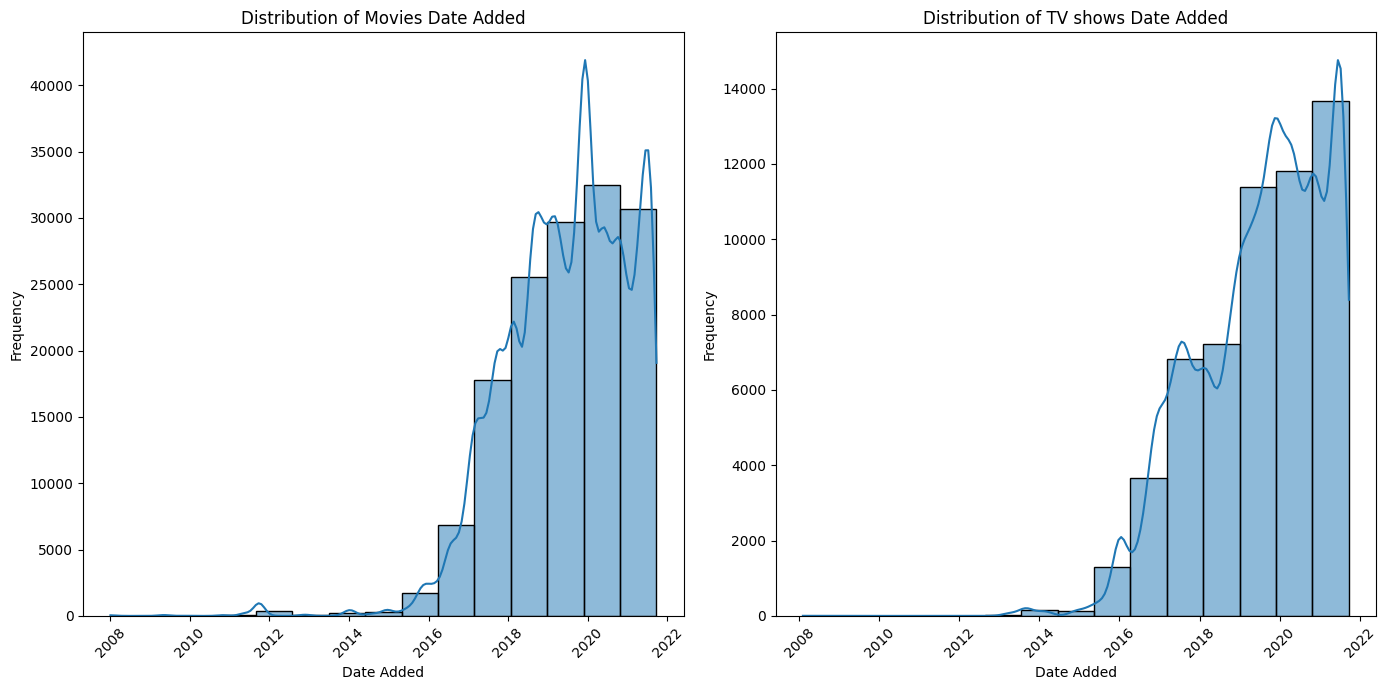

In [74]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.histplot(fdf_Movies['date_added'], bins=15, kde=True)
plt.title('Distribution of Movies Date Added')
plt.xlabel('Date Added')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Boxplot for TV Shows
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.histplot(fdf_TV_shows['date_added'], bins=15, kde=True)
plt.title('Distribution of TV shows Date Added')
plt.xlabel('Date Added')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [75]:
fdf_date_added_M = fdf_Movies.groupby(['date_added']).agg({"title":"nunique"}).sort_values(by='title', ascending=False).reset_index()[:11]

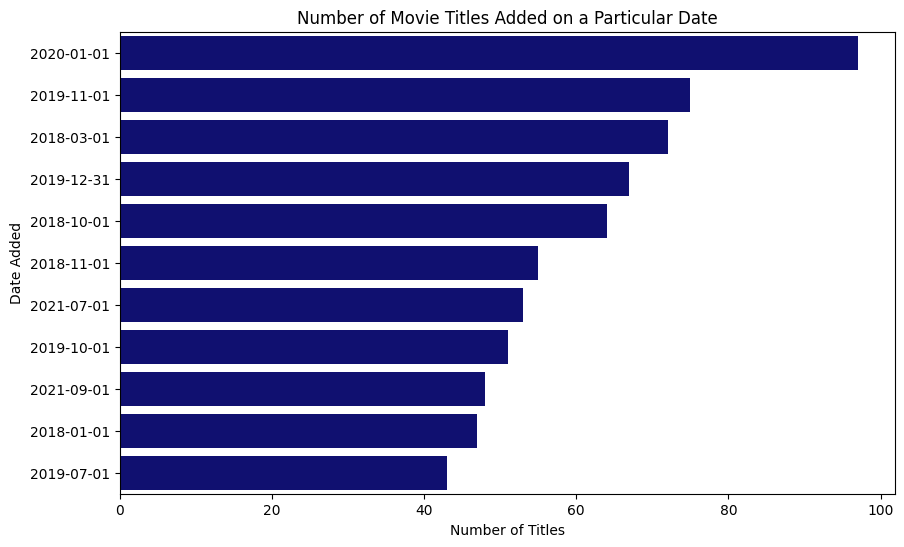

In [76]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='title', y='date_added', data=fdf_date_added_M, color='navy')
plt.xlabel('Number of Titles')
plt.ylabel('Date Added')
plt.title('Number of Movie Titles Added on a Particular Date')
plt.show()

In [77]:
fdf_date_added_TV = fdf_TV_shows.groupby(['date_added']).agg({"title":"nunique"}).sort_values(by='title', ascending=False).reset_index()[:11]

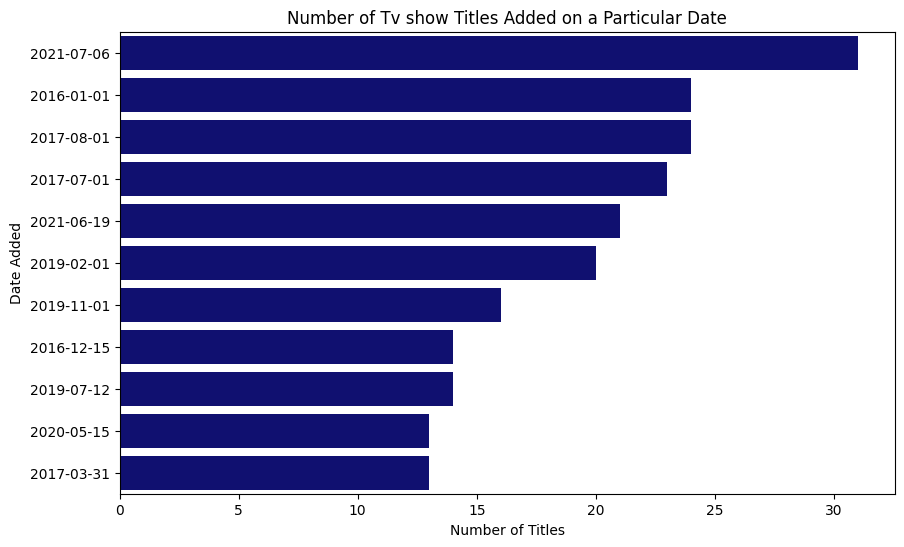

In [78]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='title', y='date_added', data=fdf_date_added_TV, color='navy')
plt.xlabel('Number of Titles')
plt.ylabel('Date Added')
plt.title('Number of Tv show Titles Added on a Particular Date')
plt.show()

##### <span style="color: purple;">Release year.</span>
- we can see from the histogram that since year 2000, number of movies releasing increased drastically

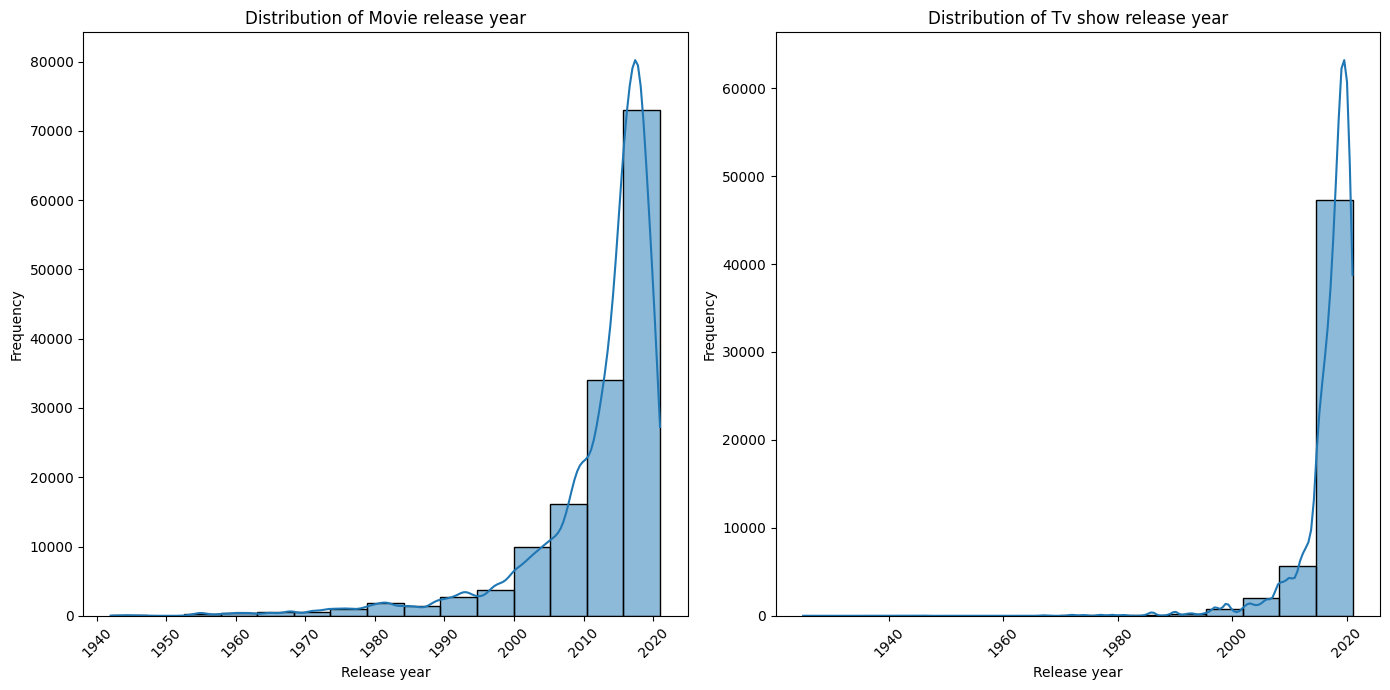

In [79]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.histplot(fdf_Movies['release_year'], bins=15, kde=True)
plt.title('Distribution of Movie release year')
plt.xlabel('Release year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Boxplot for TV Shows
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.histplot(fdf_TV_shows['release_year'], bins=15, kde=True)
plt.title('Distribution of Tv show release year')
plt.xlabel('Release year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#####   <span style="color: red;">Bivariate</span>

In [80]:
fdf.head()

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,Documentaries,s1,Movie,2021-09-25,2020,PG-13,90.0
1,Blood & Water,Unknown Director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2.0
2,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021,TV-MA,2.0
3,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,2021-09-24,2021,TV-MA,2.0
4,Blood & Water,Unknown Director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2.0


- What type of content is available in different countries?
    - as we can see both Movies and Tv shows are mostly produced in USA,
    - it is very interesting to note here that in Japana and south korea More Number of TV Shows are being produced in comparison to Movies
    - there are countries like india, where the TV Show potential is yet seemingly untapped.

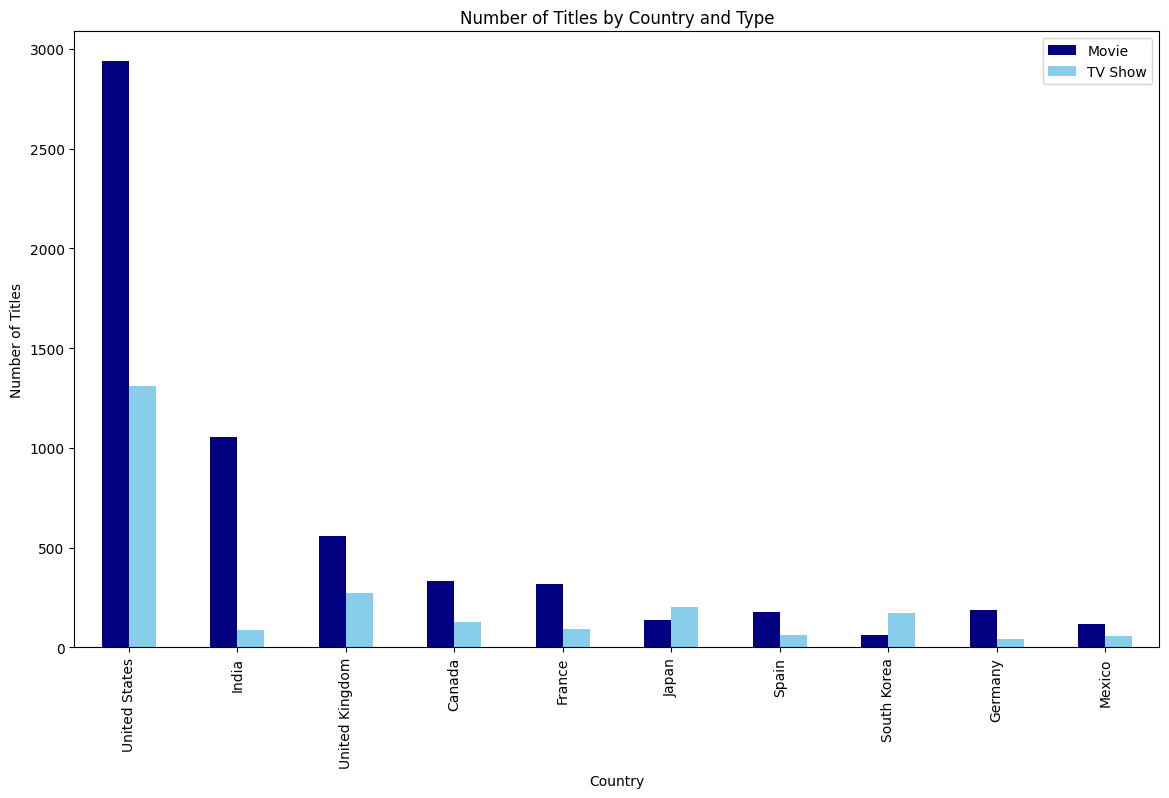

In [81]:
# Aggregate unique titles by country and type
fdf_country_type = fdf.groupby(['country', 'type']).agg({"title": "nunique"}).unstack().fillna(0).reset_index()
fdf_country_type.columns = ['country', 'Movie', 'TV Show']
fdf_country_type['Total'] = fdf_country_type['Movie'] + fdf_country_type['TV Show']
fdf_country_type = fdf_country_type.sort_values(by='Total', ascending=False).head(10)  # Top 10 countries
fdf_country_type= fdf_country_type[['country', 'Movie', 'TV Show']]
# Plot grouped bar chart
fdf_country_type.plot(kind='bar', x='country', figsize=(14, 8), color=['navy', 'skyblue'])
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.title('Number of Titles by Country and Type')
plt.show()

- What type of content is directed by top 15 directors by number of titles?
    - as we can see overall number of Movies directed outnumber directed TV Shows 
    - in top 15 directors by Title counts, Marcus raboy & Anurag kashyab contributes to Both TV Show and Movies 
    - as we had seen earlier Rajiv chilaka has the highest number of Movies produced.

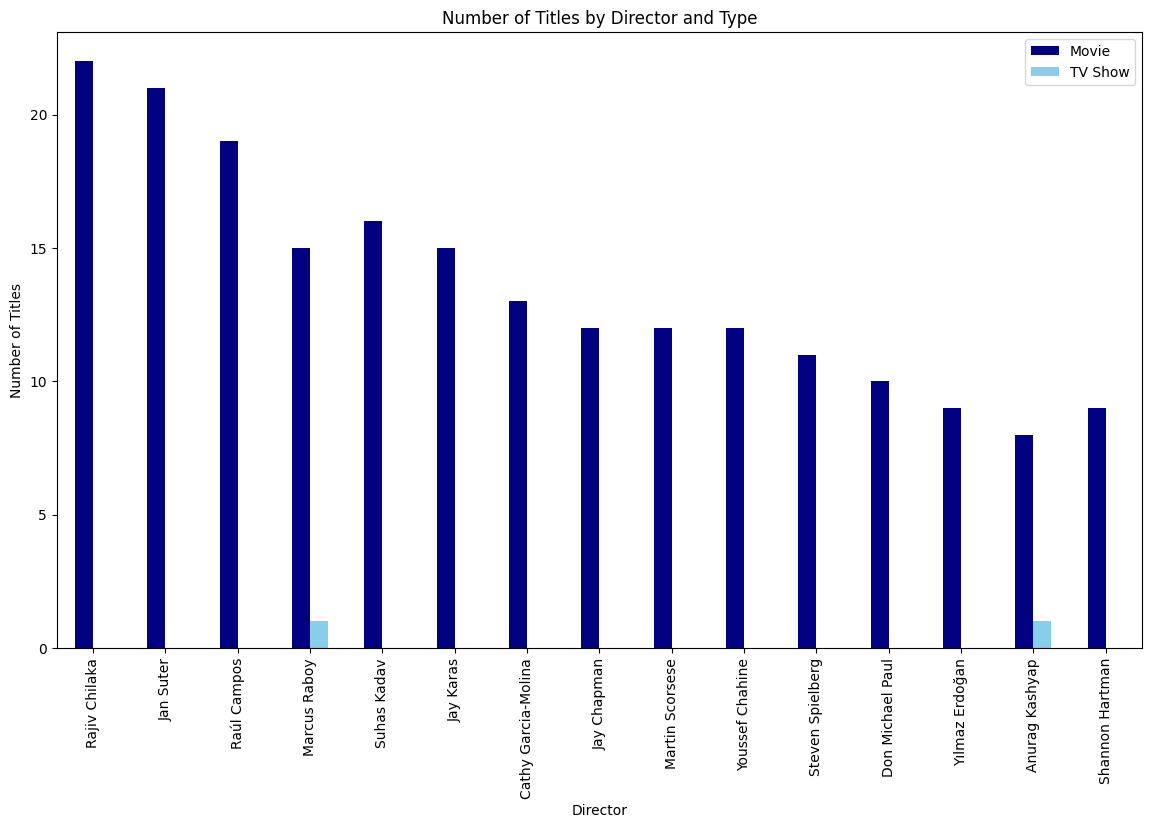

In [82]:
# Aggregate unique titles by director and type
fdf_director_type = fdf.groupby(['director', 'type']).agg({"title": "nunique"}).unstack().fillna(0).reset_index()
fdf_director_type.columns = ['director', 'Movie', 'TV Show']
fdf_director_type['Total'] = fdf_director_type['Movie'] + fdf_director_type['TV Show']
fdf_director_type = fdf_director_type.sort_values(by='Total', ascending=False).head(16)  # Top 15 directors+
fdf_director_type= fdf_director_type[['director', 'Movie', 'TV Show']]
fdf_director_type = fdf_director_type[fdf_director_type['director']!='Unknown Director']


# Plot grouped bar chart
fdf_director_type.plot(kind='bar', x='director', figsize=(14, 8), color=['navy', 'skyblue'])
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.title('Number of Titles by Director and Type')
plt.show()


- What type of content top 15 Actors acted in by number of titles?
    - as we had seen earlier Anupam Kher has the highest number of Movies acted on, and additionally we can see that he has a small contribution to TV Show as well
    - Also as seen earlier Japanese Content is more inclined towards TV Shows compared to movies, here we can see Actor 'Takahiro Sakurai' and 'Yuki kaji' has more contribution to TV Show 
    - surprisingly canadian actor 'Vincent Tong' has equally worked for both type of Movies and TV Shows

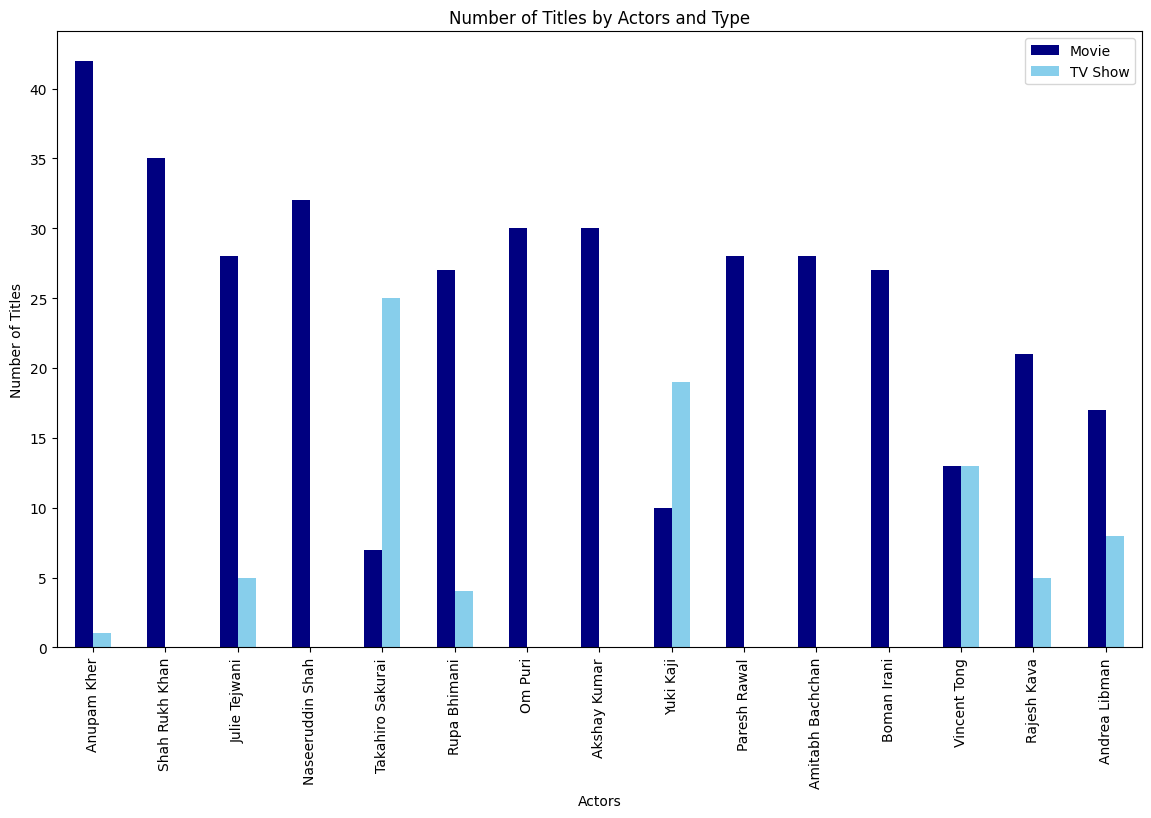

In [83]:
# Aggregate unique titles by director and type
fdf_cast_type = fdf.groupby(['cast', 'type']).agg({"title": "nunique"}).unstack().fillna(0).reset_index()
fdf_cast_type.columns = ['cast', 'Movie', 'TV Show']
fdf_cast_type['Total'] = fdf_cast_type['Movie'] + fdf_cast_type['TV Show']
fdf_cast_type = fdf_cast_type.sort_values(by='Total', ascending=False).head(16)  # Top 15 directors+
fdf_cast_type= fdf_cast_type[['cast', 'Movie', 'TV Show']]
fdf_cast_type = fdf_cast_type[fdf_cast_type['cast']!='Unknown Actor']


# Plot grouped bar chart
fdf_cast_type.plot(kind='bar', x='cast', figsize=(14, 8), color=['navy', 'skyblue'])
plt.xlabel('Actors')
plt.ylabel('Number of Titles')
plt.title('Number of Titles by Actors and Type')
plt.show()


- What type of Genre falls under Movies and Tv shows by Title counts ?
    - as we can infer fromt he plot that every Genre associated with TV Shows has 'TV ' word present in them.
    - International movies is at the top and International TV Shows at 4th place 

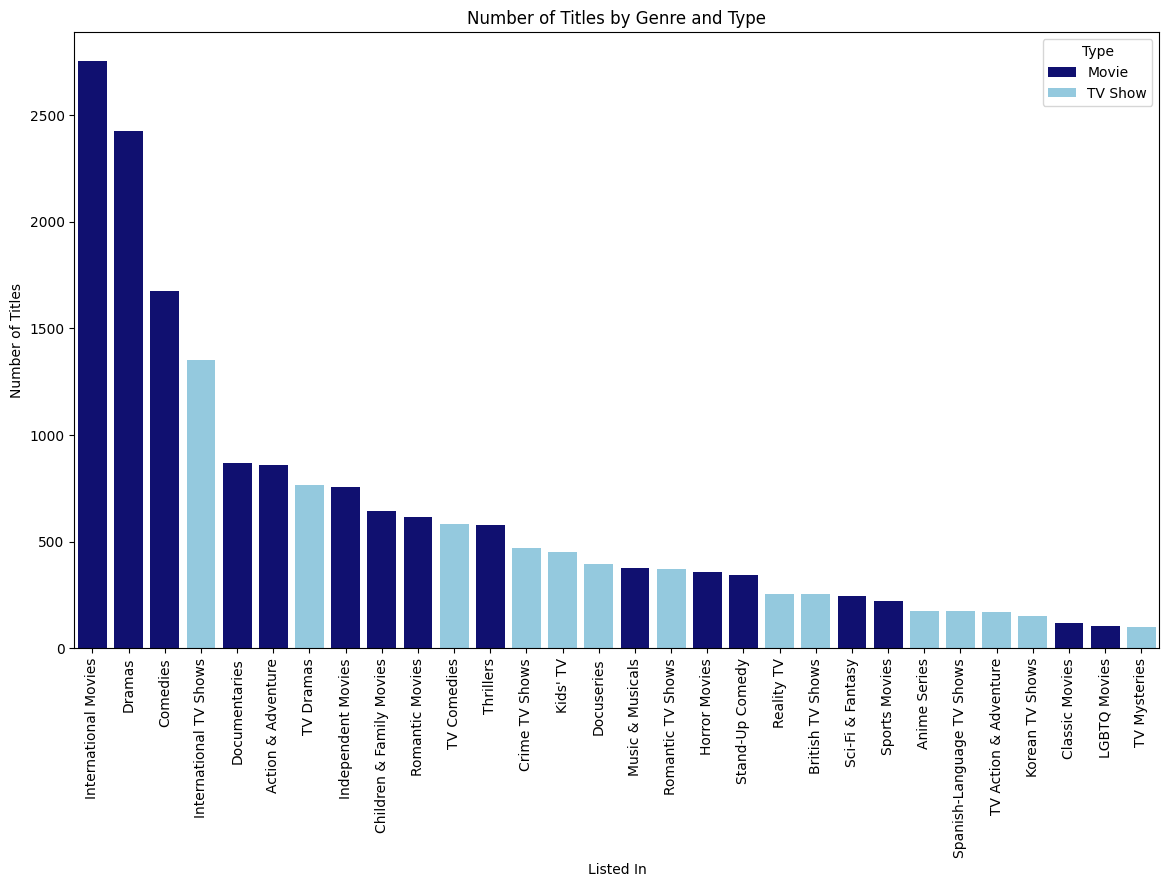

In [84]:
fdf_listed_in_type = fdf.groupby(['listed_in', 'type']).agg({"title": "nunique"}).reset_index()

# Sort the data by the total number of unique titles
fdf_listed_in_type['Total'] = fdf_listed_in_type.groupby('listed_in')['title'].transform('sum')
fdf_listed_in_type = fdf_listed_in_type.sort_values(by='Total', ascending=False).head(30)
fdf_listed_in_type = fdf_listed_in_type[['listed_in', 'type', 'title']]

# Plot bar chart with hue
plt.figure(figsize=(14, 8))
sns.barplot(x='listed_in', y='title', hue='type', data=fdf_listed_in_type, palette=['navy', 'skyblue'])
plt.xlabel('Listed In')
plt.ylabel('Number of Titles')
plt.title('Number of Titles by Genre and Type')
plt.xticks(rotation=90)
plt.legend(title='Type')
plt.show()

- What is the distribution of Durations by type of content ?
    - as we can see from bar plot 1 season in TV shows is at the top to have more number of titles under it.
    - we had seen earlier that No. of Movies outnumbers TV Shows, but stil wht do we have 1 season at top here? 
        - if we check entire bar plot we can see that mpst of the bars belong to Movie type hence the total number of titles would be more for Movies but unquely 1season has the highest number of titles 
    - we can see that it is practical to compare, 80-90 min and 1-5 seasons they have almost same number of titles

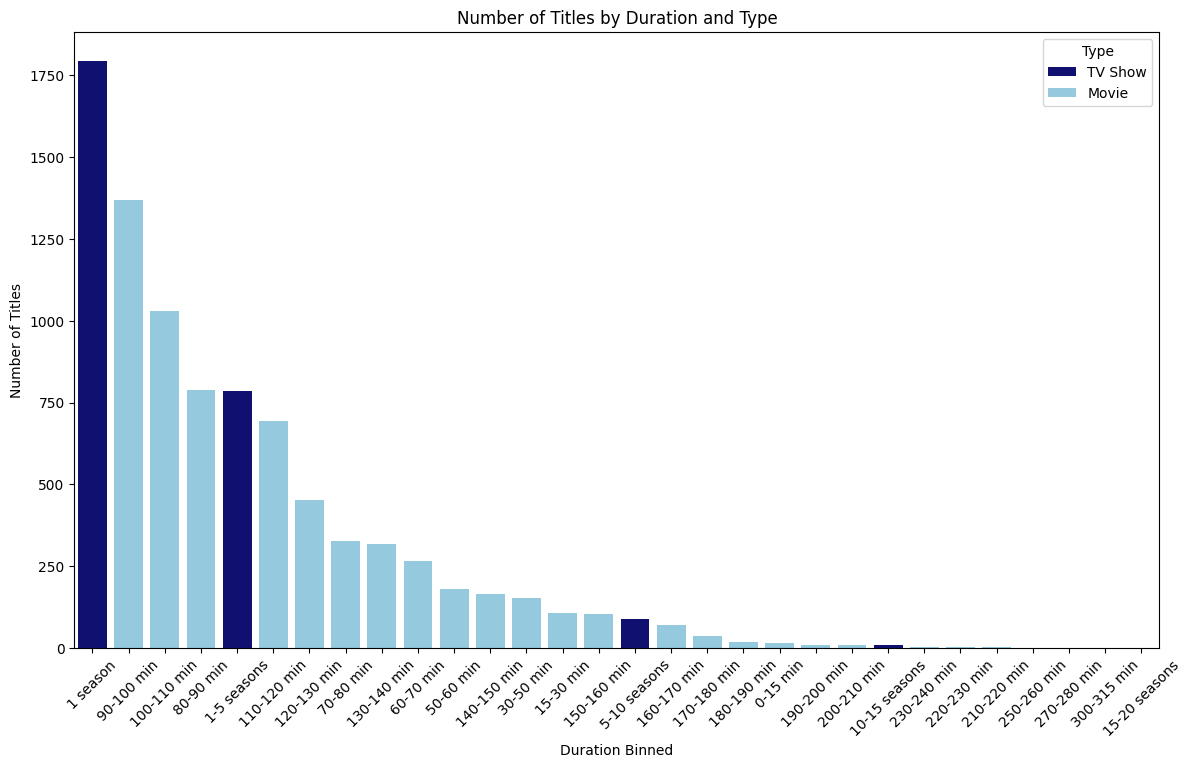

In [85]:
fdf_combined = pd.concat([fdf_Movies, fdf_TV_shows])

fdf_duration_type = fdf_combined.groupby(['duration_binned', 'type']).agg({"title": "nunique"}).reset_index()

# Sort the data by the total number of unique titles
fdf_duration_type['Total'] = fdf_duration_type.groupby('duration_binned')['title'].transform('sum')
fdf_duration_type = fdf_duration_type.sort_values(by='Total', ascending=False).head(30)
fdf_duration_type = fdf_duration_type[['duration_binned', 'type', 'title']]

# Plot bar chart with hue
plt.figure(figsize=(14, 8))
sns.barplot(x='duration_binned', y='title', hue='type', data=fdf_duration_type, palette=['navy', 'skyblue'])
plt.xlabel('Duration Binned')
plt.ylabel('Number of Titles')
plt.title('Number of Titles by Duration and Type')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()

#####   <span style="color: red;">Heat Map & Pair plots</span>

- we will create more numerical fields to get a Heat map and pairplot here
- although there are no meaningful numerical features in this dataset, but we can attempt to see if we can find something interesting in the data that we have.
- as we can see here, Most of the movies were added on Friday, this id due to the narrative set by Hollywood on Buzz of Movies spread better on beginning of weekend and Auspicious day for indians.

In [86]:
fdf['year_added'] = fdf['date_added'].dt.year
fdf['month_added'] = fdf['date_added'].dt.month
fdf['weekday_added'] = fdf['date_added'].dt.dayofweek

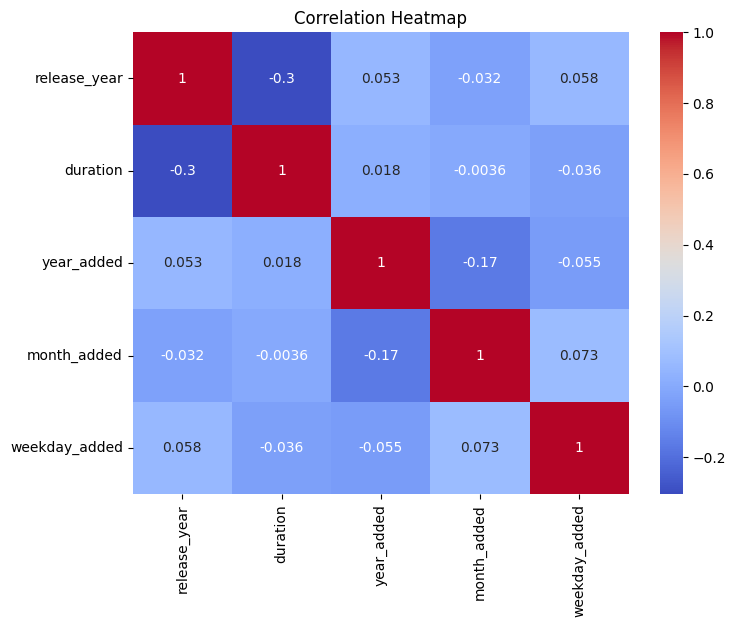

In [87]:
correlation_matrix = fdf[["release_year", "duration","year_added","month_added","weekday_added"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

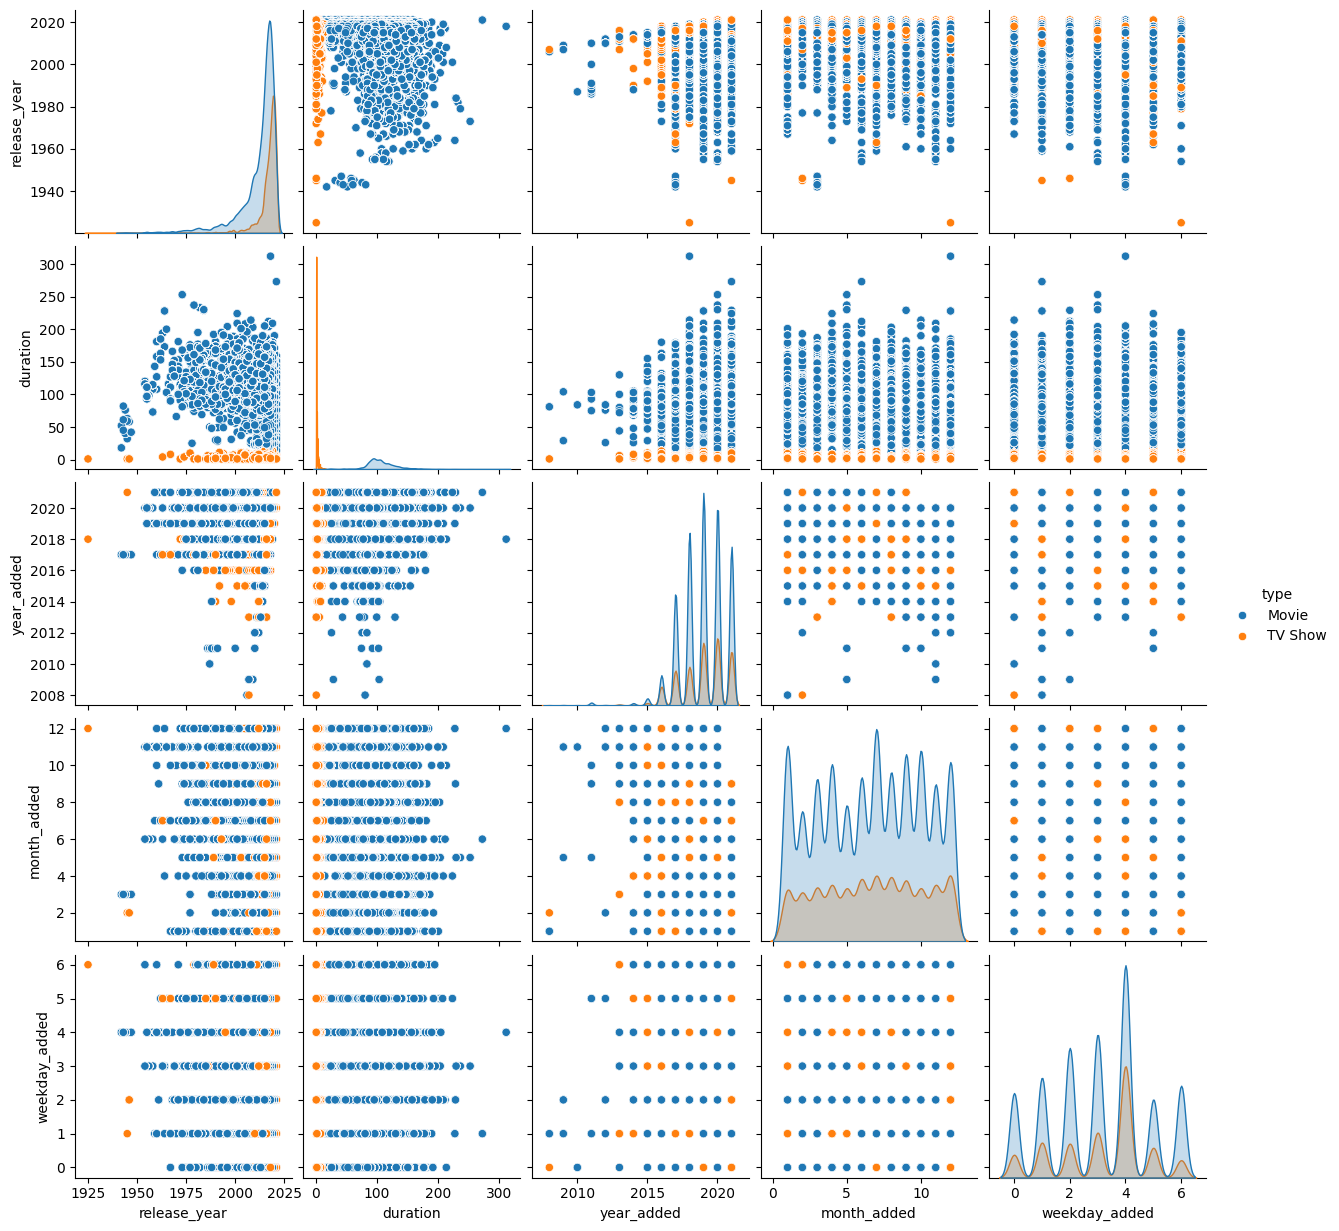

In [88]:
sns.pairplot(fdf[["release_year", "duration", "year_added","month_added","weekday_added","type"]], hue="type")
plt.show()


#####   <span style="color: red;">Further Data Exploratiton</span>

- How has the number of movies/Tv shows released per year changed over the last 20-30 years?
    - The pace of Movie releases was somewhat slow until 1996, but since 1996 ther's been notable increase in the realese of movies and Tv shows started out with good pace since 2005 
    - Growth in Number of Movies and TV shows skyrocketed since 2014 
    - It is interesting to note here that, TV Shows ended up o the higher side on comparison with movies

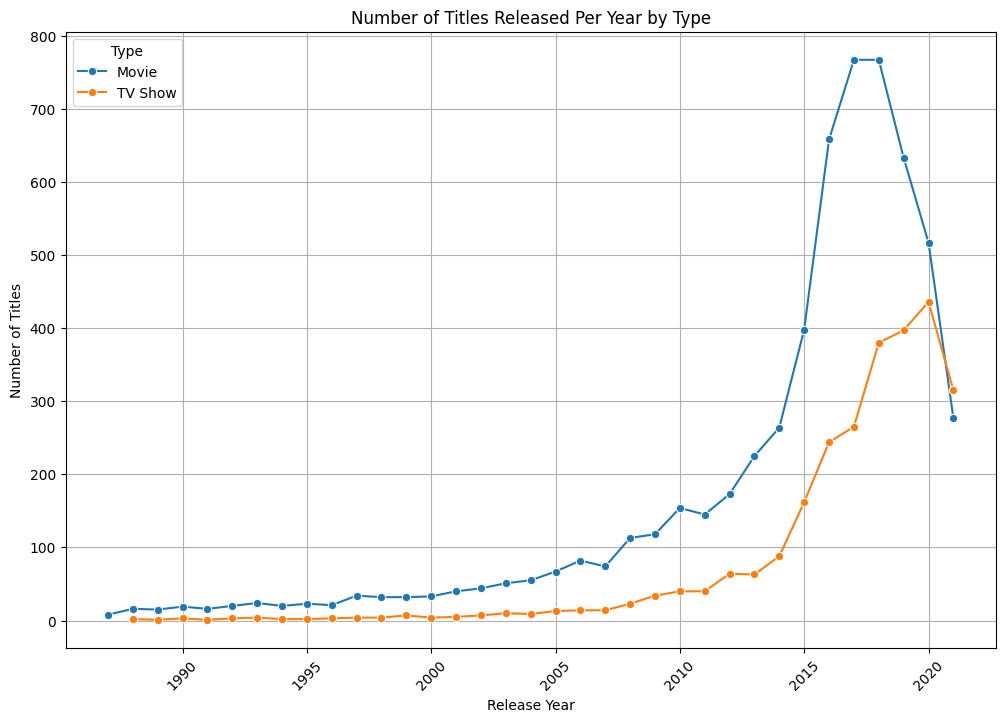

In [189]:
titles_per_year_type = fdf.groupby(['release_year', 'type']).agg({"title": "nunique"}).reset_index()[50:]

# Plot the number of titles released per year with hue as type
plt.figure(figsize=(12, 8))
sns.lineplot(x='release_year', y='title', hue='type', data=titles_per_year_type, marker='o')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.title('Number of Titles Released Per Year by Type')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Type')
plt.show()

- How has the number of movies/tv shows added in the platform per month changed over the last few years?
    - Growth in number of movies added started accelerating since June -2016
    - November 2019 was the highest recorded month for adding 187 Movies!
    - July-2021 was the highest recorded month for adding 88 TV Shows!

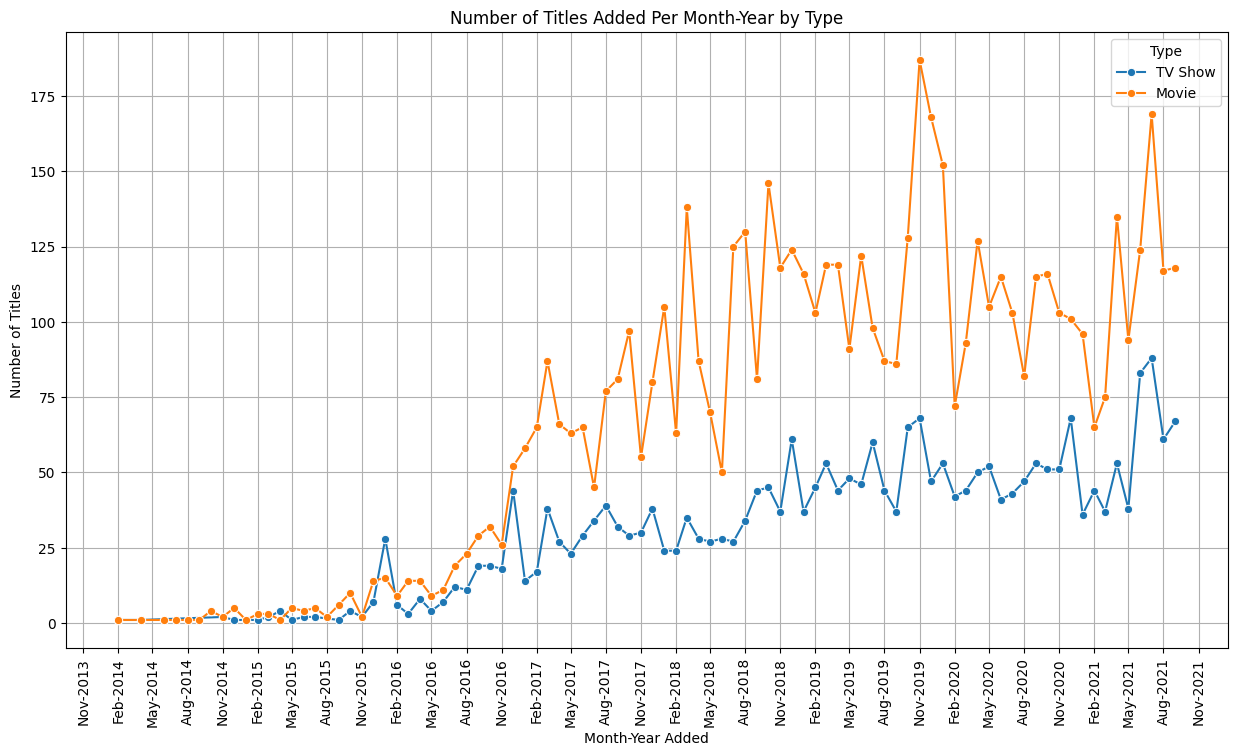

In [90]:

import matplotlib.dates as mdates
fdf['month_year_added'] = fdf['date_added'].dt.strftime('%b-%Y')

titles_per_month_year_type = fdf.groupby(['month_year_added', 'type']).agg({"title": "nunique"}).reset_index()

titles_per_month_year_type['month_year_added'] = pd.to_datetime(titles_per_month_year_type['month_year_added'], format='%b-%Y')
titles_per_month_year_type = titles_per_month_year_type.sort_values('month_year_added')[20:]

plt.figure(figsize=(15, 8))
sns.lineplot(x='month_year_added', y='title', hue='type', data=titles_per_month_year_type, marker='o')
plt.xlabel('Month-Year Added')
plt.ylabel('Number of Titles')
plt.title('Number of Titles Added Per Month-Year by Type')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend(title='Type')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  

plt.show()

In [91]:
titles_per_month_year_type[titles_per_month_year_type['type']=='Movie']['title'].max(), titles_per_month_year_type[titles_per_month_year_type['type']=='TV Show']['title'].max()

(187, 88)

In [92]:
fdf.head()

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,year_added,month_added,weekday_added,month_year_added
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,Documentaries,s1,Movie,2021-09-25,2020,PG-13,90.0,2021,9,5,Sep-2021
1,Blood & Water,Unknown Director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2.0,2021,9,4,Sep-2021
2,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021,TV-MA,2.0,2021,9,4,Sep-2021
3,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,2021-09-24,2021,TV-MA,2.0,2021,9,4,Sep-2021
4,Blood & Water,Unknown Director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2.0,2021,9,4,Sep-2021


- 5 Most popular Genre's in top 5 Countries.
    - India is ahead in most famous Interntional Movies genre
    - US leads most of other genre 

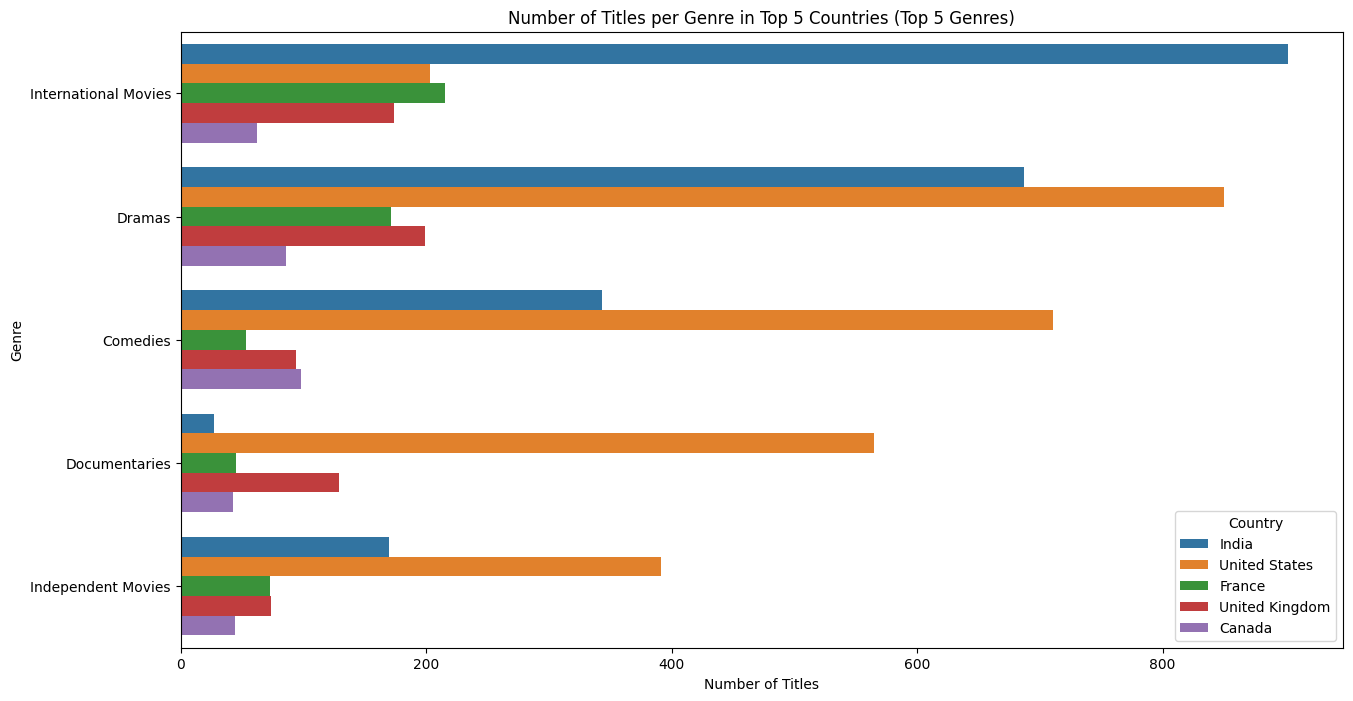

In [93]:
# Group by country and count the number of unique titles
country_titles = fdf.groupby('country').agg({"title": "nunique"}).reset_index()
top_5_countries = country_titles.sort_values(by='title', ascending=False)[:5]

# Filter the dataset to include only the top 10 countries
filtered_fdf = fdf[fdf['country'].isin(top_5_countries['country'])]
country_genre_titles = filtered_fdf.groupby(['country', 'listed_in']).agg({"title": "nunique"}).reset_index()
genre_counts = filtered_fdf.groupby('listed_in')['title'].nunique().reset_index()

top_genres = genre_counts.sort_values(by='title', ascending=False).head(5)['listed_in'].tolist()

country_genre_titles_top5 = country_genre_titles[country_genre_titles['listed_in'].isin(top_genres)].sort_values(by='title', ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x='title', y='listed_in', hue='country', data=country_genre_titles_top5)
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.title('Number of Titles per Genre in Top 5 Countries (Top 5 Genres)')
plt.legend(title='Country')
plt.show()

- 5 Most popular Actors in top 5 Countries.
    - All 5 actors are Indian and   most of them worked in US as well

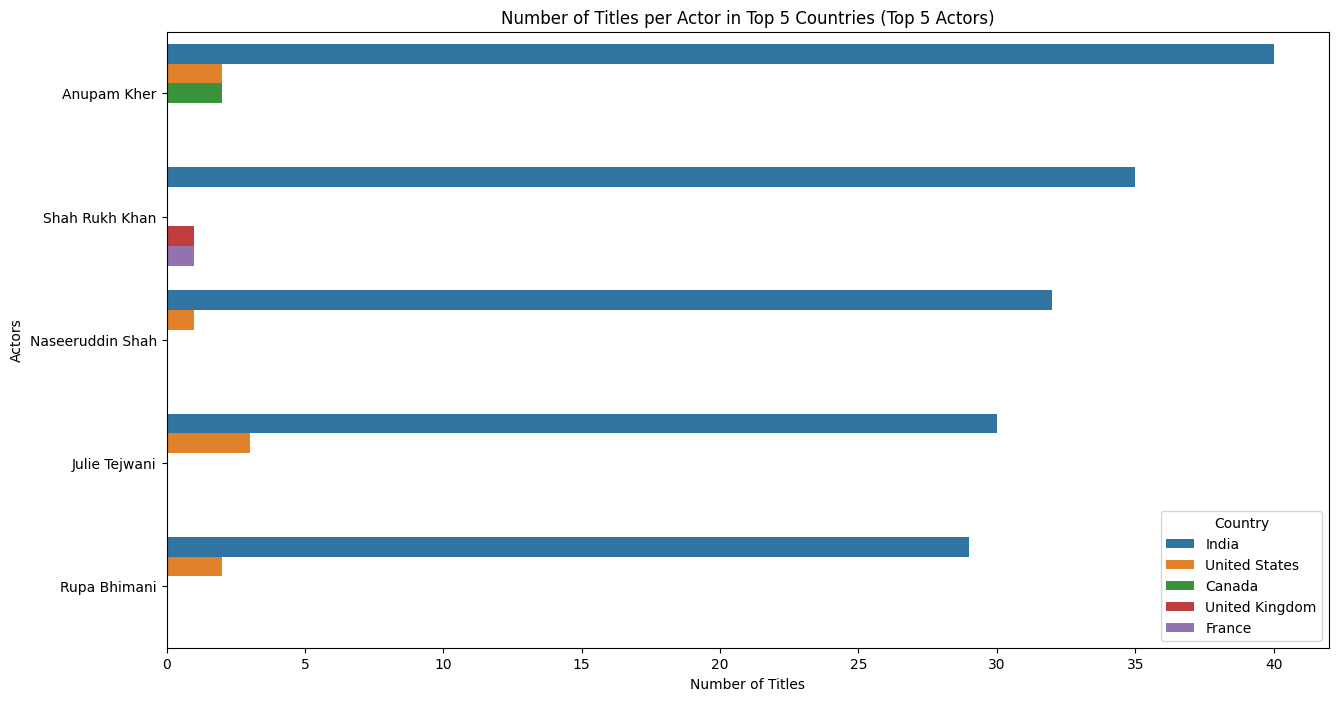

In [94]:
country_actor_titles = filtered_fdf.groupby(['country', 'cast']).agg({"title": "nunique"}).reset_index()


actor_counts = filtered_fdf.groupby('cast')['title'].nunique().reset_index()

top_actors = actor_counts.sort_values(by='title', ascending=False).head(6)['cast'].tolist()

country_actor_titles_top5 = country_actor_titles[country_actor_titles['cast'].isin(top_actors)].sort_values(by='title', ascending=False)
country_actor_titles_top5 = country_actor_titles_top5[country_actor_titles_top5['cast']!='Unknown Actor']

plt.figure(figsize=(15, 8))
sns.barplot(x='title', y='cast', hue='country', data=country_actor_titles_top5)
plt.xlabel('Number of Titles')
plt.ylabel('Actors')
plt.title('Number of Titles per Actor in Top 5 Countries (Top 5 Actors)')
plt.legend(title='Country')
plt.show()

- 5 Most popular directors in top 5 Countries.

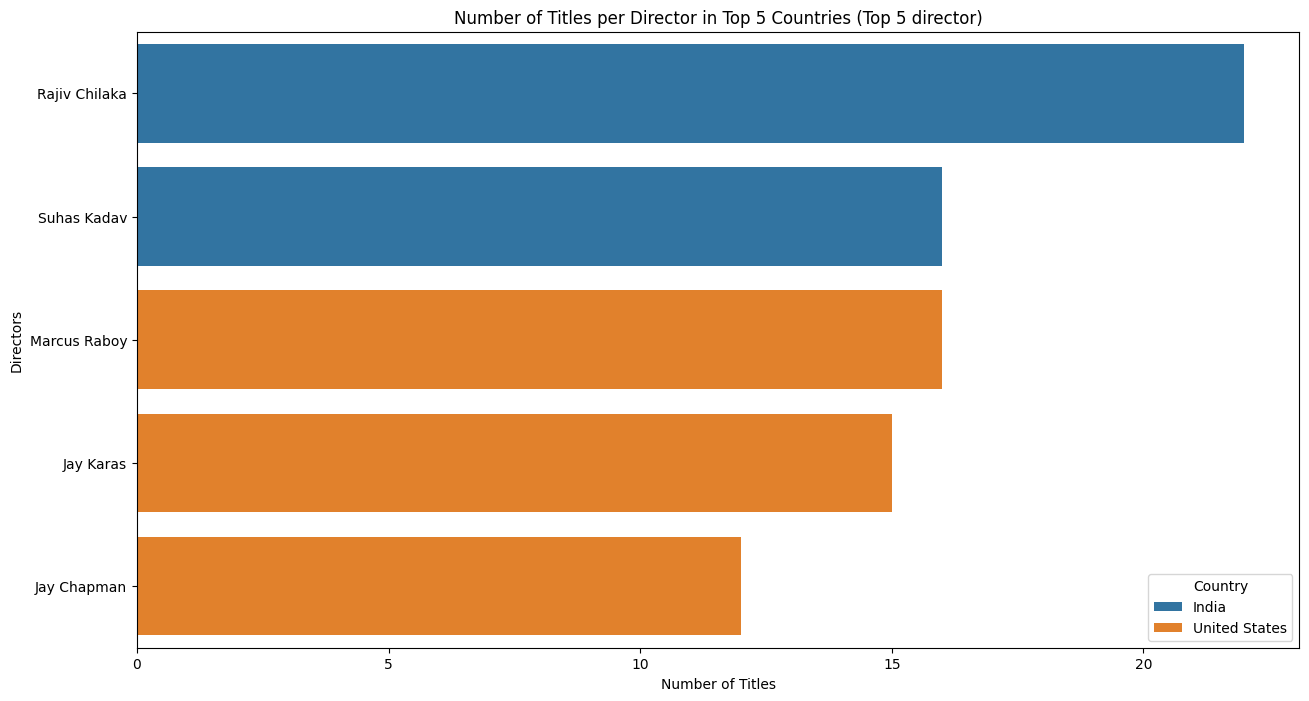

In [95]:
country_director_titles = filtered_fdf.groupby(['country', 'director']).agg({"title": "nunique"}).reset_index()


director_counts = filtered_fdf.groupby('director')['title'].nunique().reset_index()

top_directors = director_counts.sort_values(by='title', ascending=False).head(6)['director'].tolist()

country_director_titles_top5 = country_director_titles[country_director_titles['director'].isin(top_directors)].sort_values(by='title', ascending=False)
country_director_titles_top5 = country_director_titles_top5[country_director_titles_top5['director']!='Unknown Director']

plt.figure(figsize=(15, 8))
sns.barplot(x='title', y='director', hue='country', data=country_director_titles_top5)
plt.xlabel('Number of Titles')
plt.ylabel('Directors')
plt.title('Number of Titles per Director in Top 5 Countries (Top 5 director)')
plt.legend(title='Country')
plt.show()

- 6 Most popular ratings in top 5 Countries.
    - Most of the ratings have more titles in USA because it has higher conribution in overall Movies/TV show
    - interesting to note that in inida R Rating is neglible, R Rating means kids under 17 are not recommended to watch.
    - interesting to note that in inida PG-13 Rating is neglible, PG-13 Rating means kids under 13 are not recommended to watch.

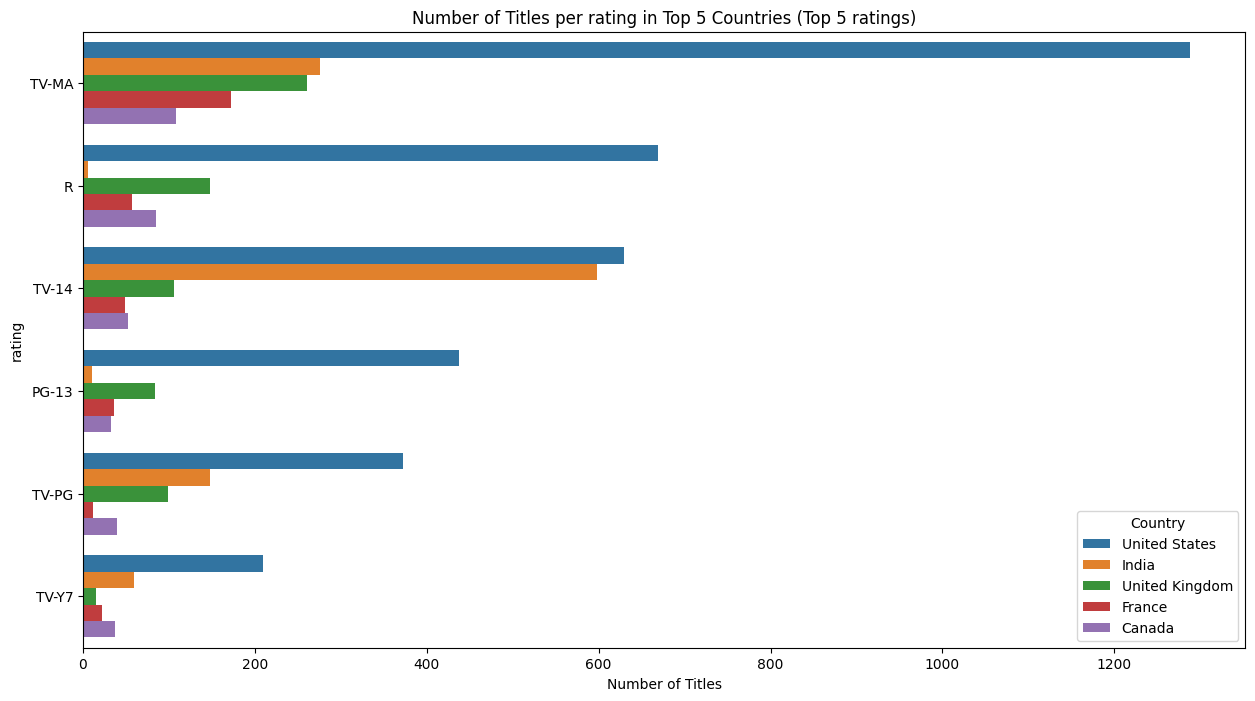

In [213]:
country_rating_titles = filtered_fdf.groupby(['country', 'rating']).agg({"title": "nunique"}).reset_index()


rating_counts = filtered_fdf.groupby('rating')['title'].nunique().reset_index()

top_ratings = rating_counts.sort_values(by='title', ascending=False).head(6)['rating'].tolist()

country_rating_titles_top5 = country_rating_titles[country_rating_titles['rating'].isin(top_ratings)].sort_values(by='title', ascending=False)
country_rating_titles_top5 = country_rating_titles_top5[country_rating_titles_top5['rating']!='Unknown Director']

plt.figure(figsize=(15, 8))
sns.barplot(x='title', y='rating', hue='country', data=country_rating_titles_top5)
plt.xlabel('Number of Titles')
plt.ylabel('rating')
plt.title('Number of Titles per rating in Top 5 Countries (Top 5 ratings)')
plt.legend(title='Country')
plt.show()

- 5 Most popular directors in top 5 Genres.
    - we can see here preferences of directors varies, cathy is more focused on International Movies and David dhavan is more focused on Comedies while martin specialises for Drama

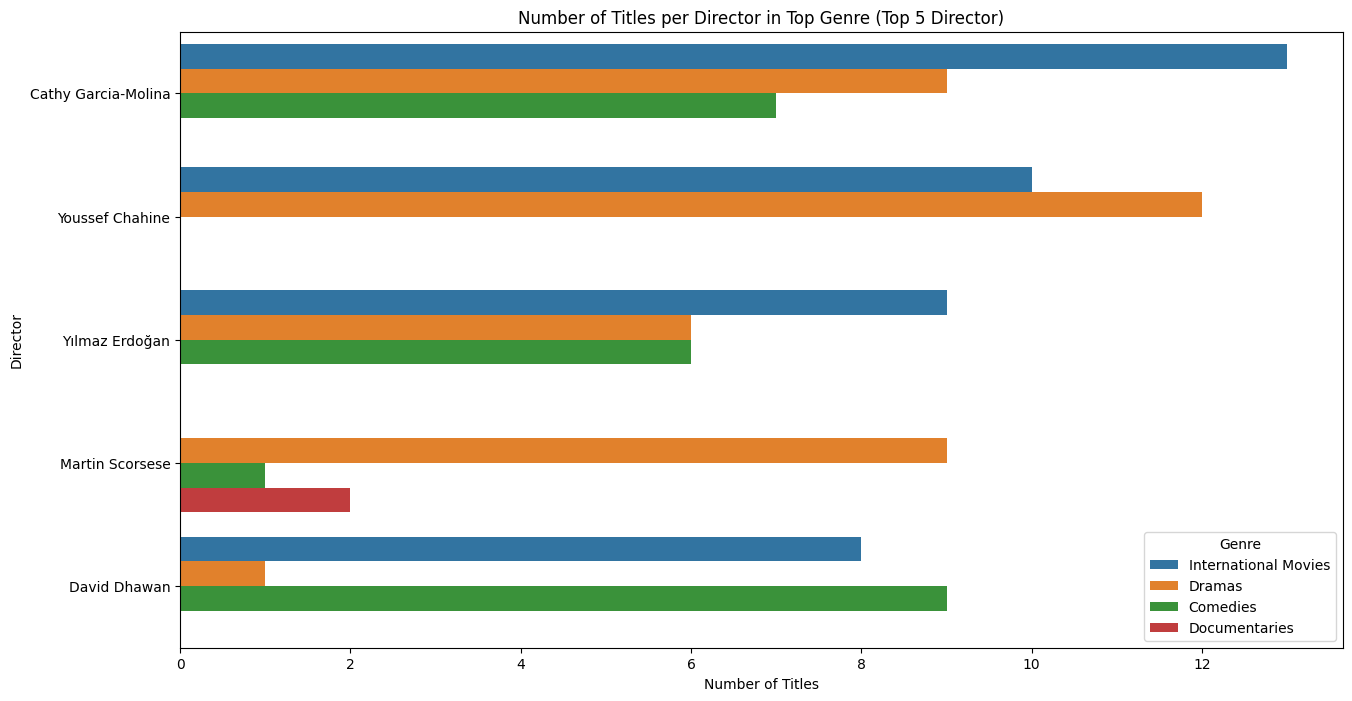

In [97]:
# Group by country and count the number of unique titles
Genre_titles = fdf.groupby('listed_in').agg({"title": "nunique"}).reset_index()
top_5_Genre = Genre_titles.sort_values(by='title', ascending=False)[:5]

# Filter the dataset to include only the top 10 countries
filtered_fdf_genre = fdf[fdf['listed_in'].isin(top_5_Genre['listed_in'])]
Genre_director_titles = filtered_fdf_genre.groupby(['listed_in', 'director']).agg({"title": "nunique"}).reset_index()
director_counts = filtered_fdf_genre.groupby('director')['title'].nunique().reset_index()

top_directors = director_counts.sort_values(by='title', ascending=False).head(6)['director'].tolist()

Genre_director_titles_top5 = Genre_director_titles[Genre_director_titles['director'].isin(top_directors)].sort_values(by='title', ascending=False)
Genre_director_titles_top5= Genre_director_titles_top5[Genre_director_titles_top5['director']!='Unknown Director']

plt.figure(figsize=(15, 8))
sns.barplot(x='title', y='director', hue='listed_in', data=Genre_director_titles_top5)
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.title('Number of Titles per Director in Top Genre (Top 5 Director)')
plt.legend(title='Genre')
plt.show()

- 5 Most popular Actors in top 5 Genres.
    -  Most of the names here were seen earlier, this means these actors majorly focus on International Movies, Dramas and comedies  

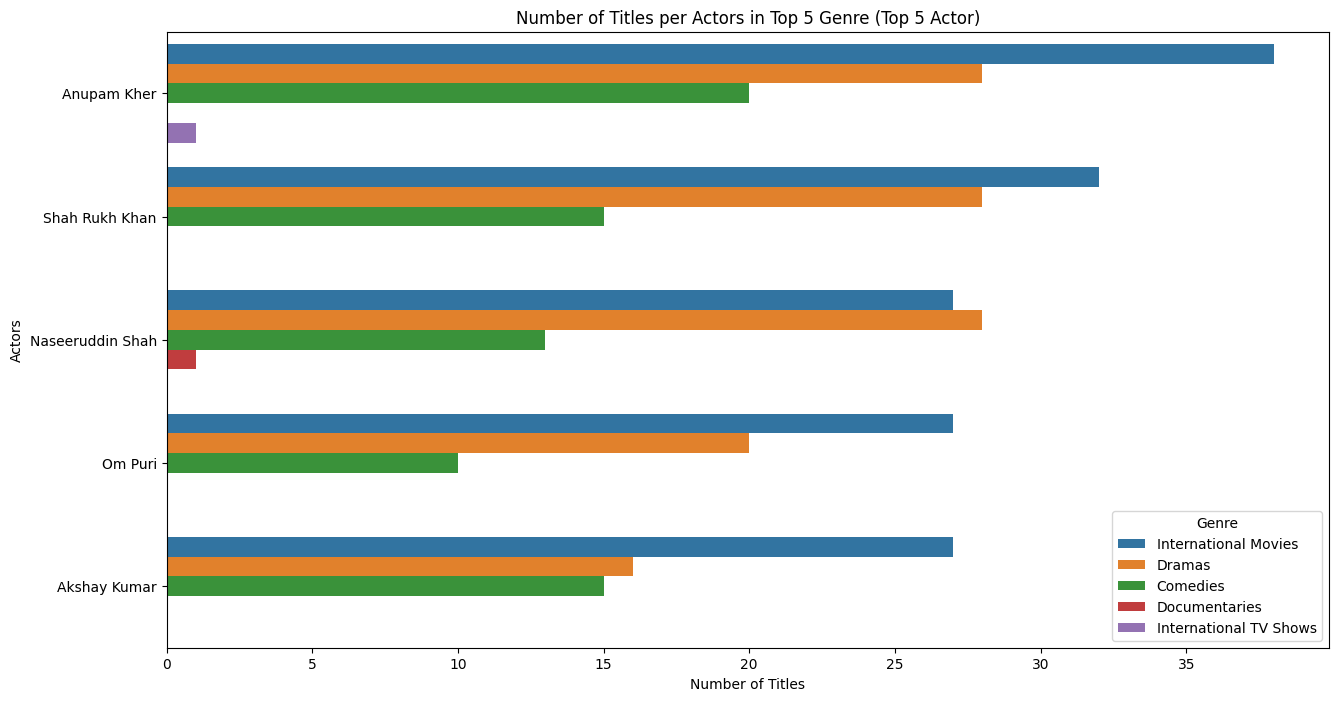

In [98]:
Genre_Actor_titles = filtered_fdf_genre.groupby(['listed_in', 'cast']).agg({"title": "nunique"}).reset_index()


actor_counts = filtered_fdf.groupby('cast')['title'].nunique().reset_index()

top_actors = actor_counts.sort_values(by='title', ascending=False).head(8)['cast'].tolist()

Genre_Actor_titles_top5 = Genre_Actor_titles[Genre_Actor_titles['cast'].isin(top_actors)].sort_values(by='title', ascending=False)
Genre_Actor_titles_top5 = Genre_Actor_titles_top5[Genre_Actor_titles_top5['cast']!='Unknown Actor']

plt.figure(figsize=(15, 8))
sns.barplot(x='title', y='cast', hue='listed_in', data=Genre_Actor_titles_top5)
plt.xlabel('Number of Titles')
plt.ylabel('Actors')
plt.title('Number of Titles per Actors in Top 5 Genre (Top 5 Actor)')
plt.legend(title='Genre')
plt.show()

- Top 5 duration intervals for most popular Genres 
    - Comedies and Documentries have more number of titles under 90-100 Minutes 
    - International Movies and Dramas have more number of titles under 100-110 Minutes

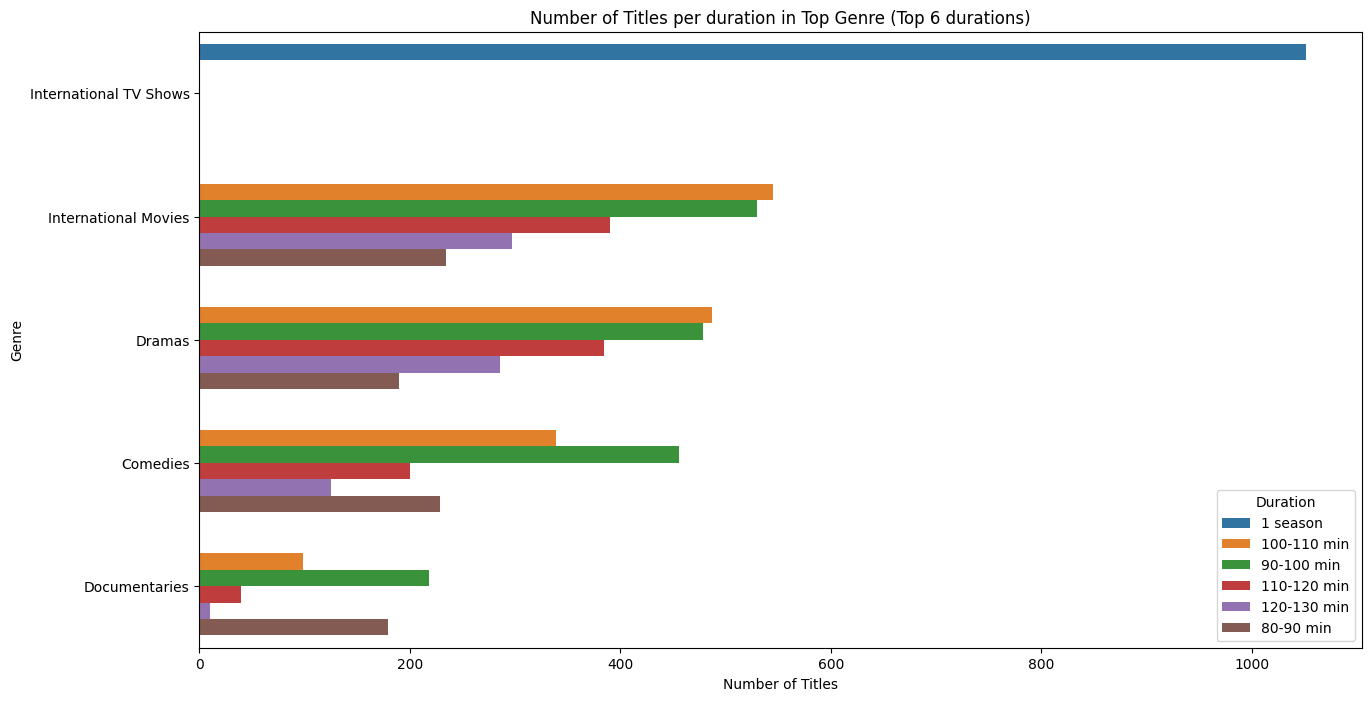

In [188]:
Genre_titles_comb = fdf_combined.groupby('listed_in').agg({"title": "nunique"}).reset_index()
top_5_Genre_comb = Genre_titles_comb.sort_values(by='title', ascending=False)[:5]

filtered_fdf_comb_genre = fdf_combined[fdf_combined['listed_in'].isin(top_5_Genre_comb['listed_in'])]
Genre_duration_binned_titles = filtered_fdf_comb_genre.groupby(['listed_in', 'duration_binned']).agg({"title": "nunique"}).reset_index()
duration_binned_counts = filtered_fdf_comb_genre.groupby('duration_binned')['title'].nunique().reset_index()

top_duration_binned = duration_binned_counts.sort_values(by='title', ascending=False).head(6)['duration_binned'].tolist()

Genre_duration_binned_titles_top5 = Genre_duration_binned_titles[Genre_duration_binned_titles['duration_binned'].isin(top_duration_binned)].sort_values(by='title', ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x='title', y='listed_in', hue='duration_binned', data=Genre_duration_binned_titles_top5)
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.title('Number of Titles per duration in Top Genre (Top 6 durations)')
plt.legend(title='Duration')
plt.show()

- Duration of Movies vs Release Year
    - Interestingly we can see here that shorter content was almost not there before 2010 and after 2010 number of shorter content has increased 9.8 times
    - for Movies the range of 60-145 minutes have the highest number of titles.

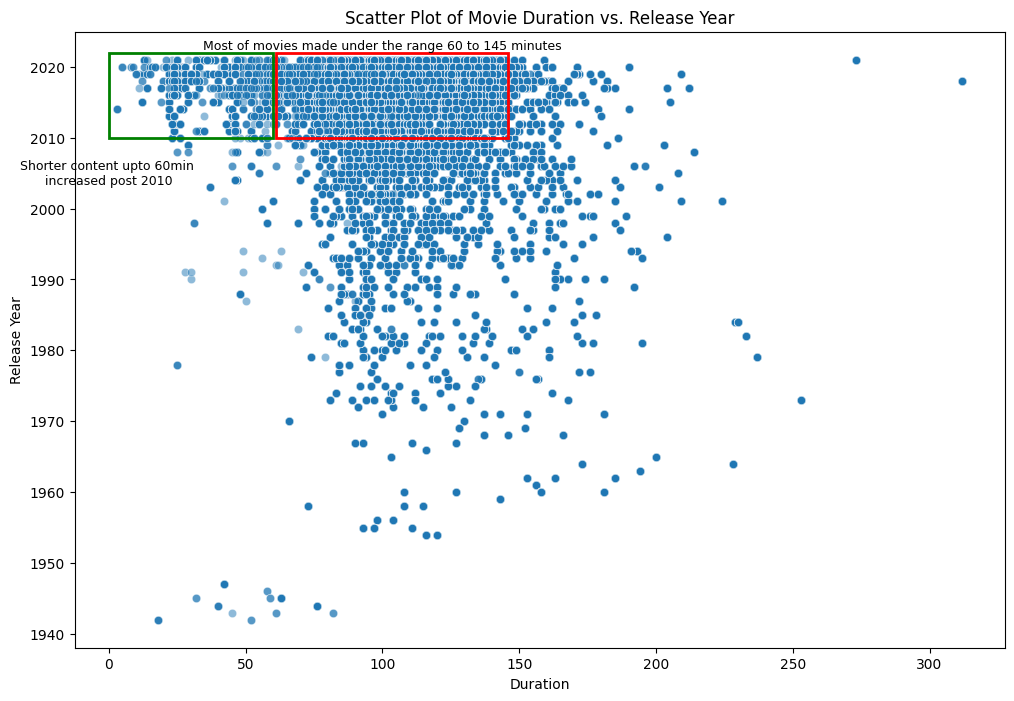

In [99]:
import matplotlib.patches as patches

plt.figure(figsize=(12, 8))
sns.scatterplot(x=fdf_Movies['duration'], y=fdf_Movies['release_year'], alpha=0.5)

# Define the coordinates and size for the rectangles
rect1 = patches.Rectangle((61, 2010), 85, 12, linewidth=2, edgecolor='red', facecolor='none')
rect2 = patches.Rectangle((0, 2010), 60, 12, linewidth=2, edgecolor='green', facecolor='none')

plt.gca().add_patch(rect1)
plt.gca().add_patch(rect2)

# Add labels to the rectangles
plt.text(100, 2023, 'Most of movies made under the range 60 to 145 minutes', horizontalalignment='center', verticalalignment='center', color='black', fontsize=9)
plt.text(0, 2005, 'Shorter content upto 60min \nincreased post 2010', horizontalalignment='center', verticalalignment='center', color='black', fontsize=9)

plt.xlabel('Duration')
plt.ylabel('Release Year')
plt.title('Scatter Plot of Movie Duration vs. Release Year')
plt.show()


In [100]:
(df[(df['type']=='Movie')&(df['duration']<60)&(df['release_year']<2010)]['title'].nunique()),(df[(df['type']=='Movie')&(df['duration']<60)&(df['release_year']>2010)]['title'].nunique())

(38, 411)

- Duration of Tv shows vs Release Year
    - after year 2000 all duration of TV Shows started adding up 
    - Tv shows with longer duration of 12+ seasons started post 2010

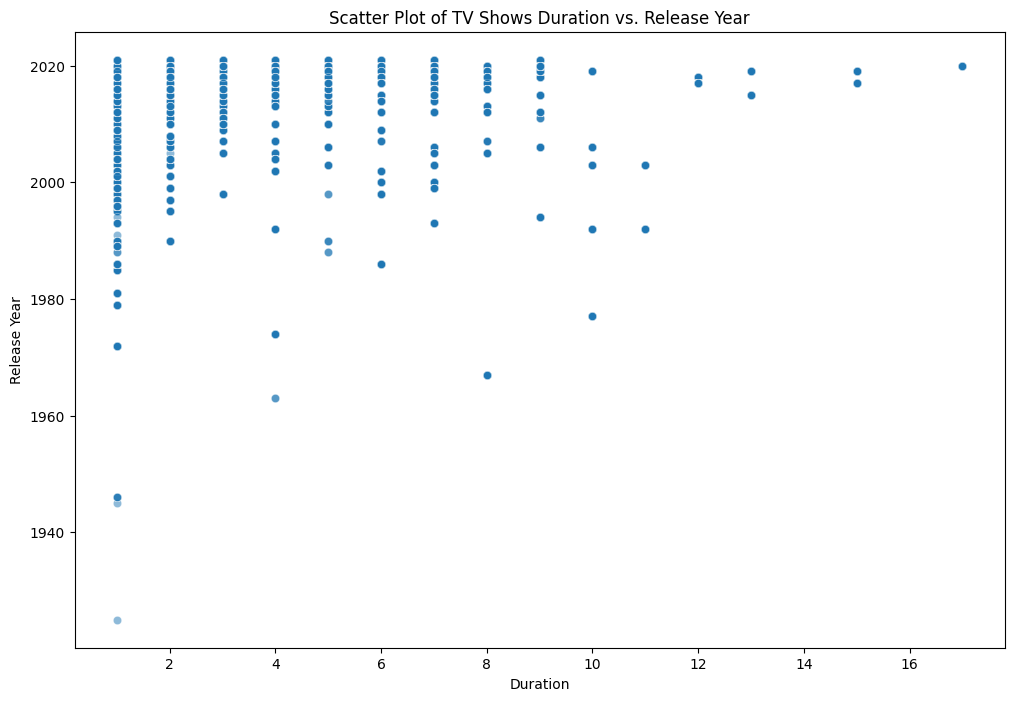

In [101]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=fdf_TV_shows['duration'], y=fdf_TV_shows['release_year'], alpha=0.5)

plt.xlabel('Duration')
plt.ylabel('Release Year')
plt.title('Scatter Plot of TV Shows Duration vs. Release Year')
plt.show()

- Director Actor Combination 
    - Rajiv Chilaka has good combination with 7 Actors
    - Suhas yadav with Saurav Chakraborty	
    - Yılmaz Erdoğan with Yılmaz Erdoğan
    - S.S. Rajamouli with Sathyaraj

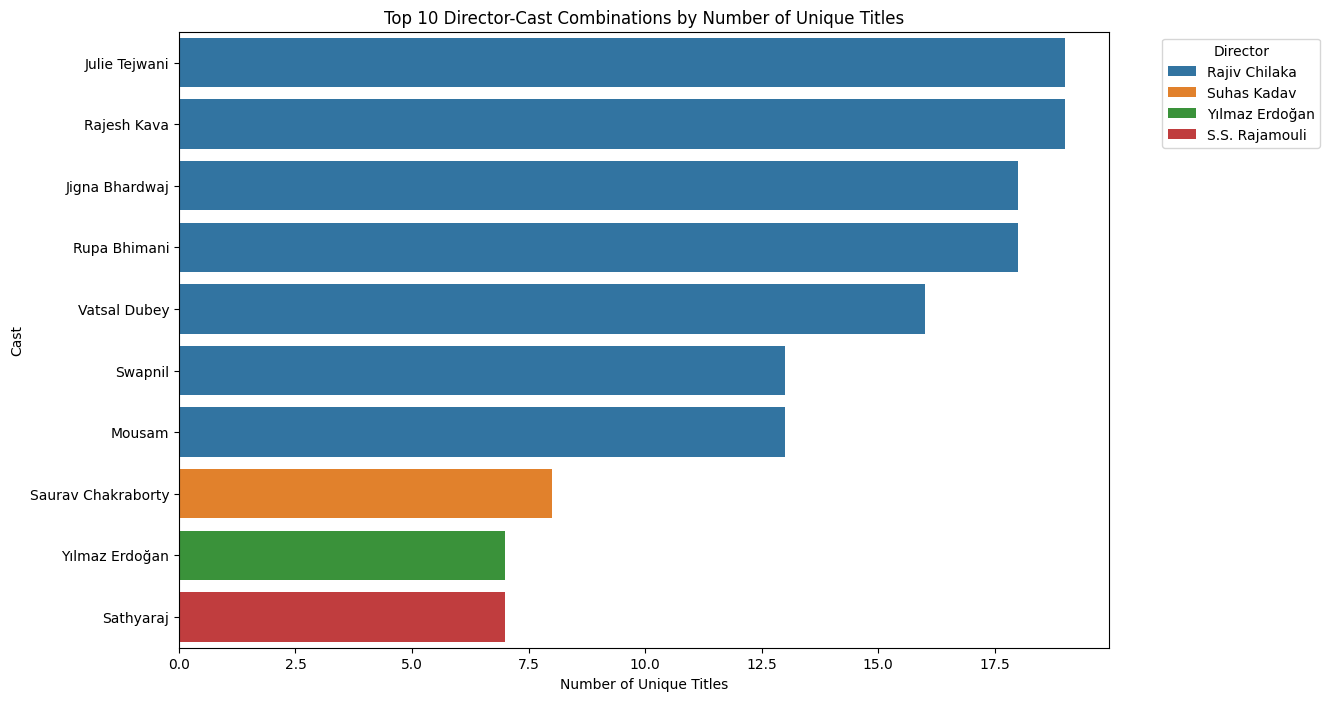

In [350]:
director_cast_counts = fdf.groupby(['director', 'cast']).agg({'title': 'nunique'}).reset_index()
director_cast_counts= director_cast_counts[(director_cast_counts['director']!='Unknown Director')&(director_cast_counts['cast']!='Unknown Actor')]
0
top_10_director_cast = director_cast_counts.sort_values(by='title', ascending=False).head(10)

# Plot the top 10 combinations using seaborn bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='title', y='cast', hue='director', data=top_10_director_cast)
plt.xlabel('Number of Unique Titles')
plt.ylabel('Cast')
plt.title('Top 10 Director-Cast Combinations by Number of Unique Titles')
plt.legend(title='Director', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#####   <span style="color: navy;">Insights based on Non-Graphical and Visual Analysis</span>

- Distribution of Netflix collection in Movies is 69.6% and in TV Shows it is 30.4%
- Netflix collection of Movies spans from Year 1942 to 2021 (i.e 79 Years) and Tv shows span from Year 1925 to 2021 (i.e 96 Years)
- collection of netflix consist 8807 Titles, 36440 Actors, 4994 Directors, 42 Genre, 124 Countries and  15 Content Ratings are there.
- features by Number of Title :-
    - Top 5 Director:-
        1. Rajiv Chilaka
        2. Jan Suter
        3. Raúl Campos
        4. Marcus Raboy	
        5. Suhas Kadav
    - Top 5 Actors:-
        1. Anupam Kher
        2. Shah Rukh Khan	
        3. Julie Tejwani	
        4. Naseeruddin Shah	
        5. Takahiro Sakurai
    - Top 5 Countries:-
        1. United States	
        2. India
        3. United Kingdom	
        4. Canada
        5. France
    - Top 5 Genre:-
        1. International Movies	
        2. Dramas
        3. Comedies
        4. International TV Shows	
        5. Documentaries	
    - Top 5 Content Rating:-
        1. TV-MA	
        2. TV-14	
        3. TV-PG	
        4. R
        5. PG-13	
    - Top 5 Durations 
        1. 1 season (TV Shows)
        2. 90-100 Min (Movie)
        3. 100-110 Min (Movie)
        4. 110-120 Min (Movie)
        5. 1-5 Seasons (TV Shows)

- overall July has been observed as highest title additions of 831(9.43%) followed by december at 813(9.23%) titles added, and February with lowest number of additions at 563(6.39%)
- Friday is most popular to release shows having 2502 (28.04%) addition, while Sunday is the least popular with 752 (8.53%)  additions 
- in year 2018, 2019 and 2020 before pandamic years No. of Releasing Movies declined and No. of TV Shows Advanced, this shows TV Shows are getting more poplar recently 
- in year 2021, No. of TV Shows releasing crossed the No. of Movies released , although overall both declined due to pandemic 
- addition of Shorter Conrent accelerated since 2010, with a staggering 9.8 times compared to before 2010
- Most of Movies Movies fall under 60-145 Min duration Range
- It is observed that Netflix is More focused in Mature rated Movies / TV shows 
- rating of Anime series Genre somewhat Matches with Kids series in the collection, but Kids series is spread in 30 countries in comparison to Anime series only 10 Countries 

#####   <span style="color: navy;">Business Insights</span>

- 81.67% content is produced in top 10 countries and the rest 114 countries contribute 18.33%
- out of the 114 countries some economically powerful countries are, 
    1. China
    2. Australia
    3. Brazil
    4. Italy
    5. Russia
- Top 4 ratings contribute 79.81% content and the rest 11 rating type 20.19%
    1. TV-MA (36.41%)
    2. TV-14 (24.53%)
    3. TV-PG (9.8%)
    4. R (9.07%)
        - It is known that R rating in india has very few titles (6)
- 93.52% of the content was added in the netfix in 5 years(2017-2021) and the rest 6.48% was added in 9 years (2008 - 2017)
- Average Duration of Movies is nearly 106 Min and Tv shows is 2 seasons 
    - we can note here that 1 title count of movie = 106 Min of possible watchtime & 1 title count of TV Show = 2 season of possible watchtime 
- Top 10 Genre covers 65.77% and the rest 32 Genre covers 34.23% 
    - out of the rest 32 Genre following can be interesting to explore:-
        1. TV Comedies 
        2. Thrillers
        3. Crime TV Shows 
        4. Kids TV 
        5. Docuseries 

#####   <span style="color: navy;">Recommendation</span>

- As seen in the Business Insight, Most of the counry's content potential is yet to unflod, and many regional content is witnessed to breakthrough the popularity in recent years, so it is recommended to search for such regional content that may have the right potential to attract more users with the help of newly introduced novelty!
- it is understood that out of selective revenue models of netflix, Ad revenue is indeed an important one
    - as seen in the business insight, a movie has a possibility of 106 minutes of watch time against a Tv show of 2 seasons 
        - say 2 seasons has around 10 episodes equates to 20 episodes with each assumed duration of 40 minutes totaling to 800 minutes 
        - in a Tech platform like Netflix, Busines metrics like DAU (Daily active users), WAU (Weekly active users) & MAU (Montly active users) are crucially important to look out for, and the comparison of Movie and TV series, Tv series would increase the watchtime of users, in turn users would be more likely of renewing their subscription as well as more watchtime ensures higher Ad revenues.
- We can interpret top Genres here as widely accepted genre and content produced under such genre would have higher probability of popularity and acceptance by the audience.
- countries like Japan, Greece, Italy, Germany etc are known to have higher % of old people, Netflix can study the demographics of all countries to target the most optimal audience, in general it is undoubtedly the Adult users that is targeted but, tailoring the content based on Demographics of country might help expand the userbase.
- since pandemic, a boom in online education is seen (also known as zoom era), Netflix can tap into this demand and enable content for kids where entertaining education can help expand userbase under "Netflix for kids!"